### <font color= #D5B85A> Importing Required Packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment=None
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler,OrdinalEncoder,OneHotEncoder,StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,GroupKFold,KFold
from sklearn.linear_model  import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error as mape ,mean_absolute_error as mae, mean_squared_error
import random
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore,skew
import statsmodels.api as sm
from sklearn.cluster import KMeans
import regex as re
from xgboost import XGBRegressor
import pickle
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
from nltk import PorterStemmer
import string
from datetime import datetime

### <font color= #D5B85A> Data Exploration 

#### <font color= FF7F50> Generice Exploration

In [2]:
data=pd.read_csv('C:/Users/Admin/Desktop/car_detail_en.csv')

In [3]:
data.head(2)

ad_id             origin condition car_model mileage exterior_color  \
0  17042  Domestic assembly   New car     Truck    0 Km          White   
1  53794           Imported   New car       SUV    0 Km          Black   

  interior_color num_of_doors seating_capacity         engine fuel_system  \
0           gray       2-door           2-seat  Petrol\t1.0 L         NaN   
1          Black       5-door           7-seat  Petrol\t3.4 L         NaN   

  transmission                 drive_type fuel_consumption  \
0       Manual     RFD - Rear-wheel drive          L/100Km   
1    Automatic  AWD - 4-wheel drive (AWD)      10\tL/100Km   

                                            describe   brand  \
0   Super Carry Truck 5-pound mezzanine is equipp...  Suzuki   
1  New Toyota LANDCRUISER 300, imported from Japa...  Toyota   

               grade  year_of_manufacture  \
0  Super Carry Truck               2022.0   
1       Land Cruiser               2022.0   

                               car_name           price. price  
0  Suzuki Super Carry Truck 1.0 MT 2022            249 Million  
1       Toyota Land Cruiser 3.5 V6 2022  4 Billion 286 Million

In [4]:
data.columns

Index(['ad_id', 'origin', 'condition', 'car_model', 'mileage',
       'exterior_color', 'interior_color', 'num_of_doors', 'seating_capacity',
       'engine', 'fuel_system', 'transmission', 'drive_type',
       'fuel_consumption', 'describe', 'brand', 'grade', 'year_of_manufacture',
       'car_name', 'price. price'],
      dtype='object')

In [5]:
data.origin.value_counts()

origin
Domestic assembly    17862
Imported             12790
Name: count, dtype: int64

In [6]:
data.condition.value_counts()

condition
Used car    24582
New car      6070
Name: count, dtype: int64

In [7]:
data.car_model.value_counts()

car_model
SUV                      10646
Sedan                    10268
Hatchback                 2800
Crossover                 2748
Bán tải / Pickup        2384
Van/Minivan               1098
Truck                      425
Coupe                      180
Convertible/Cabriolet       93
Wagon                       10
Name: count, dtype: int64

In [8]:
data.mileage.value_counts()

mileage
0 Km          10442
60,000 Km       720
50,000 Km       695
40,000 Km       619
20,000 Km       616
              ...  
50,264 Km         1
16,090 Km         1
101,201 Km        1
21,570 Km         1
96,886 Km         1
Name: count, Length: 1924, dtype: int64

In [9]:
data[data.condition=='Used car'].mileage.value_counts()

mileage
0 Km          4378
60,000 Km      720
50,000 Km      695
40,000 Km      619
20,000 Km      616
              ... 
1,995 Km         1
252,000 Km       1
50,264 Km        1
16,090 Km        1
96,886 Km        1
Name: count, Length: 1921, dtype: int64

In [10]:
data.exterior_color.value_counts()

exterior_color
White              9913
Black              6760
Red                3966
Silver             2848
Green              2495
Grey               1016
Brown               835
Yellow              691
Sand                691
Take note           527
Orange              473
Copper              225
Pink                 56
Cream                53
Colorful             46
Different color      25
-                    17
Violet               15
Name: count, dtype: int64

In [11]:
data.num_of_doors.value_counts()

num_of_doors
5-door     16756
4-door     13062
2-door       676
0-door        69
3-door        53
6-door        12
1-door        12
45-door        4
7-door         4
54-door        2
44-door        1
42-door        1
Name: count, dtype: int64

In [12]:
data.seating_capacity.value_counts()

seating_capacity
5-seat     21343
7-seat      5744
8-seat      1761
4-seat       620
2-seat       442
3-seat       333
16-seat      140
6-seat       116
0-seat        55
9-seat        34
10-seat       34
29-seat       12
47-seat        4
15-seat        2
17-seat        2
12-seat        2
30-seat        1
44-seat        1
1-seat         1
11-seat        1
38-seat        1
42-seat        1
20-seat        1
46-seat        1
Name: count, dtype: int64

In [13]:
data.engine.value_counts()

engine
Petrol\t2.0 L    6352
Petrol\t1.5 L    4812
Petrol\t1.6 L    1824
Diesel\t2.2 L    1593
Petrol\t3.0 L    1342
                 ... 
Diesel\t6.7 L       1
Diesel\t9.7 L       1
Diesel\t4.0 L       1
Hybrid\t3.3 L       1
Petrol\t0.2 L       1
Name: count, Length: 95, dtype: int64

In [14]:
data.fuel_system.value_counts()

fuel_system
Electronic fuel injection    949
Gasoline                     550
electronic fuel injection    245
Electronic                   218
Direct fuel injection        178
                            ... 
private message                1
 2.0 turbo                     1
 Mechanism                     1
V6 3.5                         1
Hybrid                         1
Name: count, Length: 794, dtype: int64

In [15]:
data.transmission.value_counts()

transmission
Automatic    25136
Manual        5499
-               15
Hybrid           2
Name: count, dtype: int64

In [16]:
data.drive_type.value_counts()

drive_type
FWD - Front-wheel drive         16445
RFD - Rear-wheel drive           7176
AWD - 4-wheel drive (AWD)        4514
4WD - Four-wheel drive (4WD)     2402
-                                 107
4WD or AWD                          8
Name: count, dtype: int64

In [17]:
data.fuel_consumption.value_counts()

fuel_consumption
L/100Km        19215
6\tL/100Km      2810
7\tL/100Km      2787
8\tL/100Km      1981
5\tL/100Km      1301
               ...  
7.\tL/100Km        1
K0\tL/100Km        1
83\tL/100Km        1
85\tL/100Km        1
6,\tL/100Km        1
Name: count, Length: 76, dtype: int64

In [18]:
data['describe'].head()

0     Super Carry Truck 5-pound mezzanine is equipp...
1    New Toyota LANDCRUISER 300, imported from Japa...
2    **Registration fee support worth 15 million VN...
3     2 interior colors: black, red brown - Car ava...
4    Toyota Innova G 100% new Equipped with 2.0 eng...
Name: describe, dtype: object

In [19]:
data.brand.value_counts()

brand
Toyota           5592
Hyundai          3555
Ford             3370
Mercedes Benz    3191
Kia              2991
                 ... 
Hummer              1
Pontiac             1
Scion               1
Dongfeng            1
Changan             1
Name: count, Length: 76, dtype: int64

In [20]:
data.grade.value_counts()

grade
Ranger       1428
Vios         1014
3             838
Morning       792
GLC           784
             ... 
Cedric          1
SLK class       1
Express         1
H 100           1
CX20            1
Name: count, Length: 479, dtype: int64

In [21]:
data.year_of_manufacture.value_counts().head()

year_of_manufacture
2023.0    4006
2022.0    3737
2019.0    2914
2021.0    2753
2020.0    2585
Name: count, dtype: int64

In [22]:
data.car_name.head()

0    Suzuki Super Carry Truck 1.0 MT 2022
1         Toyota Land Cruiser 3.5 V6 2022
2         Toyota Innova G 2.0 AT 2023 car
3          Toyota Corolla Cross 1.8G 2023
4         Toyota Innova G 2.0 AT 2022 car
Name: car_name, dtype: object

In [23]:
data['price. price'].isnull().any()

False

In [24]:
data.isnull().sum()

ad_id                      0
origin                     0
condition                  0
car_model                  0
mileage                    0
exterior_color             0
interior_color             0
num_of_doors               0
seating_capacity           0
engine                     0
fuel_system            23910
transmission               0
drive_type                 0
fuel_consumption           0
describe                   0
brand                      0
grade                      0
year_of_manufacture       32
car_name                   0
price. price               0
dtype: int64

In [25]:
data.drop(columns='fuel_system',inplace=True)

In [26]:
data=data.dropna()

In [27]:
data=data.reset_index(drop=True)

In [28]:
data.isnull().any().sum()

0

In [29]:
data.columns

Index(['ad_id', 'origin', 'condition', 'car_model', 'mileage',
       'exterior_color', 'interior_color', 'num_of_doors', 'seating_capacity',
       'engine', 'transmission', 'drive_type', 'fuel_consumption', 'describe',
       'brand', 'grade', 'year_of_manufacture', 'car_name', 'price. price'],
      dtype='object')

In [30]:
data.groupby('condition').mileage.value_counts().nlargest(2)

condition  mileage
New car    0 Km       6064
Used car   0 Km       4364
Name: count, dtype: int64

In [31]:
data.dtypes

ad_id                    int64
origin                  object
condition               object
car_model               object
mileage                 object
exterior_color          object
interior_color          object
num_of_doors            object
seating_capacity        object
engine                  object
transmission            object
drive_type              object
fuel_consumption        object
describe                object
brand                   object
grade                   object
year_of_manufacture    float64
car_name                object
price. price            object
dtype: object

####  <font color= FF7F50> Changing Mileage Values

In [32]:
data.mileage=data.mileage.str.split(' ').apply(lambda x : x[0])

In [33]:
data.mileage=data.mileage.str.replace(',','')

In [34]:
data.mileage=data.mileage.astype('int64')

In [35]:
data.rename(columns={'price. price':'price'},inplace=True)

In [36]:
data.head(3)

ad_id             origin condition  car_model  mileage exterior_color  \
0  17042  Domestic assembly   New car      Truck        0          White   
1  53794           Imported   New car        SUV        0          Black   
2  73954  Domestic assembly   New car  Crossover        0         Silver   

  interior_color num_of_doors seating_capacity         engine transmission  \
0           gray       2-door           2-seat  Petrol\t1.0 L       Manual   
1          Black       5-door           7-seat  Petrol\t3.4 L    Automatic   
2          Brown       5-door           8-seat  Petrol\t2.0 L    Automatic   

                  drive_type fuel_consumption  \
0     RFD - Rear-wheel drive          L/100Km   
1  AWD - 4-wheel drive (AWD)      10\tL/100Km   
2     RFD - Rear-wheel drive          L/100Km   

                                            describe   brand  \
0   Super Carry Truck 5-pound mezzanine is equipp...  Suzuki   
1  New Toyota LANDCRUISER 300, imported from Japa...  Toyota   
2  **Registration fee support worth 15 million VN...  Toyota   

               grade  year_of_manufacture  \
0  Super Carry Truck               2022.0   
1       Land Cruiser               2022.0   
2             Innova               2023.0   

                               car_name                  price  
0  Suzuki Super Carry Truck 1.0 MT 2022            249 Million  
1       Toyota Land Cruiser 3.5 V6 2022  4 Billion 286 Million  
2       Toyota Innova G 2.0 AT 2023 car            885 Million

In [37]:
us_dollar_exchange=0.000042

In [38]:
# ----------- price formats in price column -------------- 
''' 1 Billion
    Billion 456 Million
    345 Million
    1 Billion 768 million '''

' 1 Billion\n    Billion 456 Million\n    345 Million\n    1 Billion 768 million '

#### <font color = 80800 > Extracting Price values

In [39]:
data.price=data.price.str.lower()

In [40]:
zero_index=data[data.price.str.strip(' ').apply(lambda x : not x[0].isdigit())].index.to_list()

In [41]:
zero_values=data.iloc[zero_index].price.apply(lambda x : '1 '+x).to_list()

In [42]:
car_data=data.copy()

In [43]:
car_data.head(2)

ad_id             origin condition car_model  mileage exterior_color  \
0  17042  Domestic assembly   New car     Truck        0          White   
1  53794           Imported   New car       SUV        0          Black   

  interior_color num_of_doors seating_capacity         engine transmission  \
0           gray       2-door           2-seat  Petrol\t1.0 L       Manual   
1          Black       5-door           7-seat  Petrol\t3.4 L    Automatic   

                  drive_type fuel_consumption  \
0     RFD - Rear-wheel drive          L/100Km   
1  AWD - 4-wheel drive (AWD)      10\tL/100Km   

                                            describe   brand  \
0   Super Carry Truck 5-pound mezzanine is equipp...  Suzuki   
1  New Toyota LANDCRUISER 300, imported from Japa...  Toyota   

               grade  year_of_manufacture  \
0  Super Carry Truck               2022.0   
1       Land Cruiser               2022.0   

                               car_name                  price  
0  Suzuki Super Carry Truck 1.0 MT 2022            249 million  
1       Toyota Land Cruiser 3.5 V6 2022  4 billion 286 million

In [44]:
car_data['changed_price']=car_data['price']

In [45]:
car_data.loc[zero_index,'changed_price']=zero_values

In [46]:
car_data.iloc[zero_index][['price','changed_price']].tail(5)

price          changed_price
30350  billion 519 million  1 billion 519 million
30446  billion 286 million  1 billion 286 million
30499  billion 286 million  1 billion 286 million
30600  billion 325 million  1 billion 325 million
30605  billion 286 million  1 billion 286 million

In [47]:
car_data.price=car_data.price.str.lower().str.strip(' ')

In [48]:
only_billion_index=car_data[~(car_data.price.str.contains('million'))].index.to_list()

In [49]:
only_billion_values=car_data.iloc[only_billion_index]['price'].apply(lambda x : x+' 0 million').to_list()

In [50]:
car_data.loc[only_billion_index,'changed_price']=only_billion_values

In [51]:
car_data.iloc[only_billion_index][['price','changed_price']].tail(5)

price        changed_price
27593  1 billion  1 billion 0 million
27652  2 billion  2 billion 0 million
29581  2 billion  2 billion 0 million
29995  2 billion  2 billion 0 million
30501  1 billion  1 billion 0 million

In [52]:
car_data['car_price']=\
car_data.changed_price.str.replace(r'billion|billions','*1e9 +',regex=True)\
.str.replace('million|millions','*1e6',regex=True).\
str.strip('s').\
apply(lambda x : eval(x))

In [53]:
car_data.car_price.describe()

count    3.062000e+04
mean     1.174406e+09
std      2.061059e+09
min      1.800000e+07
25%      4.100000e+08
50%      6.200000e+08
75%      1.030000e+09
max      5.400000e+10
Name: car_price, dtype: float64

In [54]:
car_data['price_dollars']=car_data.car_price*us_dollar_exchange

<Axes: xlabel='price_dollars', ylabel='Count'>

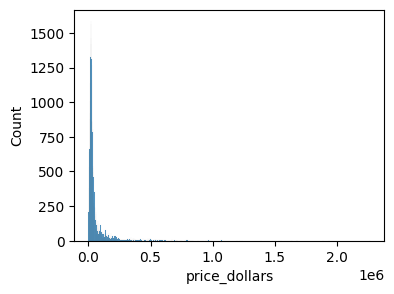

In [55]:
plt.figure(figsize=(4,3))
sns.histplot(car_data.price_dollars)

<Axes: xlabel='price_dollars', ylabel='Count'>

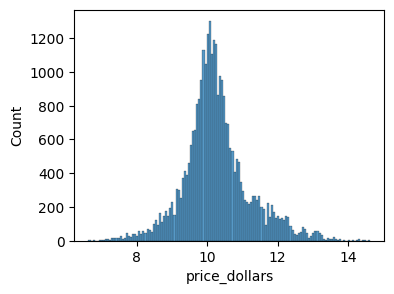

In [56]:
plt.figure(figsize=(4,3))
sns.histplot(np.log(car_data.price_dollars))

In [57]:
car_data.dtypes

ad_id                    int64
origin                  object
condition               object
car_model               object
mileage                  int64
exterior_color          object
interior_color          object
num_of_doors            object
seating_capacity        object
engine                  object
transmission            object
drive_type              object
fuel_consumption        object
describe                object
brand                   object
grade                   object
year_of_manufacture    float64
car_name                object
price                   object
changed_price           object
car_price              float64
price_dollars          float64
dtype: object

In [58]:
car_data.num_of_doors=car_data.num_of_doors.str.split('-').apply(lambda x : int(x[0]))

In [59]:
car_data.num_of_doors.unique()

array([ 2,  5,  4,  6,  1,  3, 45, 44,  7, 54,  0, 42], dtype=int64)

In [60]:
car_data.seating_capacity.unique()

array(['2-seat', '7-seat', '8-seat', '5-seat', '3-seat', '4-seat',
       '6-seat', '16-seat', '20-seat', '47-seat', '10-seat', '29-seat',
       '11-seat', '9-seat', '42-seat', '15-seat', '17-seat', '12-seat',
       '38-seat', '30-seat', '1-seat', '44-seat', '0-seat', '46-seat'],
      dtype=object)

In [61]:
car_data.seating_capacity=car_data.seating_capacity.str.split('-').apply(lambda x : int(x[0]))

In [62]:
car_data.seating_capacity.unique()

array([ 2,  7,  8,  5,  3,  4,  6, 16, 20, 47, 10, 29, 11,  9, 42, 15, 17,
       12, 38, 30,  1, 44,  0, 46], dtype=int64)

In [63]:
car_data.columns

Index(['ad_id', 'origin', 'condition', 'car_model', 'mileage',
       'exterior_color', 'interior_color', 'num_of_doors', 'seating_capacity',
       'engine', 'transmission', 'drive_type', 'fuel_consumption', 'describe',
       'brand', 'grade', 'year_of_manufacture', 'car_name', 'price',
       'changed_price', 'car_price', 'price_dollars'],
      dtype='object')

In [64]:
car_data.price_dollars=car_data.price_dollars.astype('int64')

In [65]:
car_data.engine.head(2)

0    Petrol\t1.0 L
1    Petrol\t3.4 L
Name: engine, dtype: object

#### <font color = #6495ED > converting engine values to readable and different columns

In [66]:
# first stripping trailing L and spaces later splitting by \t to get engine capacity and engine type 
engine=pd.DataFrame(car_data.engine.str.strip('L| ').str.split('\t').to_list(),
            columns=['engine_type','engine_capacity'])

In [67]:
car_data[['engine_type','engine_capacity']]=engine[['engine_type','engine_capacity']]

In [68]:
car_data.engine_capacity=car_data.engine_capacity.astype('float64')

In [69]:
car_data[['engine','engine_capacity','engine_type']].head(3)

engine  engine_capacity engine_type
0  Petrol\t1.0 L              1.0      Petrol
1  Petrol\t3.4 L              3.4      Petrol
2  Petrol\t2.0 L              2.0      Petrol

In [70]:
## thinking of filling engine_capaacity with ml

In [71]:
car_data.origin.unique()

array(['Domestic assembly', 'Imported'], dtype=object)

In [72]:
car_data.condition.unique()

array(['New car', 'Used car'], dtype=object)

In [73]:
car_data.car_model.unique()

array(['Truck', 'SUV', 'Crossover', 'Van/Minivan', 'Bán tải / Pickup',
       'Sedan', 'Hatchback', 'Wagon', 'Coupe', 'Convertible/Cabriolet'],
      dtype=object)

In [74]:
car_data.mileage=car_data.mileage.astype('int64')

In [75]:
car_data.exterior_color.unique()

array(['White', 'Black', 'Silver', 'Copper', 'Grey', 'Red', 'Brown',
       'Green', 'Take note', 'Orange', 'Yellow', 'Sand', 'Colorful',
       'Cream', 'Different color', 'Pink', 'Violet', '-'], dtype=object)

In [76]:
index_color=car_data[car_data.exterior_color=='-'].index.to_list()

In [77]:
car_data.loc[index_color,'exterior_color']='Take note'

In [78]:
car_data.exterior_color.unique()

array(['White', 'Black', 'Silver', 'Copper', 'Grey', 'Red', 'Brown',
       'Green', 'Take note', 'Orange', 'Yellow', 'Sand', 'Colorful',
       'Cream', 'Different color', 'Pink', 'Violet'], dtype=object)

In [79]:
car_data.interior_color.unique()

array(['gray', 'Black', 'Brown', 'Cream', 'Yellow', 'Colorful', 'Sand',
       'Grey', 'Red', 'Silver', 'Green', '-', 'Different color', 'White',
       'Orange', 'Copper', 'Pink', 'Violet'], dtype=object)

In [80]:
index_int=car_data[car_data.interior_color=='-'].index.to_list()

In [81]:
car_data.loc[index_int,'interior_color']='Different color'

In [82]:
car_data.interior_color.unique()

array(['gray', 'Black', 'Brown', 'Cream', 'Yellow', 'Colorful', 'Sand',
       'Grey', 'Red', 'Silver', 'Green', 'Different color', 'White',
       'Orange', 'Copper', 'Pink', 'Violet'], dtype=object)

In [83]:
car_data.transmission.unique()

array(['Manual', 'Automatic', '-', 'Hybrid'], dtype=object)

In [84]:
index_tra=car_data[car_data.transmission=='-'].index.to_list()

In [85]:
car_data.loc[index_tra,'transmission']='Hybrid'

In [86]:
car_data.transmission.unique()

array(['Manual', 'Automatic', 'Hybrid'], dtype=object)

In [87]:
car_data.columns

Index(['ad_id', 'origin', 'condition', 'car_model', 'mileage',
       'exterior_color', 'interior_color', 'num_of_doors', 'seating_capacity',
       'engine', 'transmission', 'drive_type', 'fuel_consumption', 'describe',
       'brand', 'grade', 'year_of_manufacture', 'car_name', 'price',
       'changed_price', 'car_price', 'price_dollars', 'engine_type',
       'engine_capacity'],
      dtype='object')

#### <font color = #F08080 > Filling drive_type missing values

In [88]:
car_data.drive_type.unique()

array(['RFD - Rear-wheel drive', 'AWD - 4-wheel drive (AWD)',
       'FWD - Front-wheel drive', '4WD - Four-wheel drive (4WD)',
       '4WD or AWD', '-'], dtype=object)

In [89]:
(car_data.drive_type=='-').sum()

107

In [90]:
f=car_data.groupby(['brand','grade']).drive_type.agg(pd.Series.mode).reset_index()

In [91]:
index_f=f[f.drive_type.apply(lambda x : type(x))==np.ndarray].index.to_list()

In [92]:
values_f=f[f.drive_type.apply(lambda x : type(x))==np.ndarray].drive_type.apply(lambda x : x[0])

In [93]:
f.loc[index_f,'drive_type']=list(values_f)

In [94]:
index_drive=car_data[car_data.drive_type=='-'].index

In [95]:
values_drive=list(car_data[car_data.drive_type=='-'].\
merge(f,on=['brand','grade'],how='left').drive_type_y)

In [96]:
car_data_1=car_data.copy()

In [97]:
car_data_1.loc[index_drive,'drive_type']=values_drive

In [98]:
car_data_1.drive_type.unique()

array(['RFD - Rear-wheel drive', 'AWD - 4-wheel drive (AWD)',
       'FWD - Front-wheel drive', '4WD - Four-wheel drive (4WD)',
       '4WD or AWD', '-'], dtype=object)

In [99]:
car_data_1.drop(car_data_1[car_data_1.drive_type=='-'].index.to_list(),inplace=True)

In [100]:
car_data_1=car_data_1.reset_index(drop=True)

In [101]:
car_data_1.fuel_consumption.head(3)

0        L/100Km
1    10\tL/100Km
2        L/100Km
Name: fuel_consumption, dtype: object

#### <font color = FF7F50> changing fuel_consumption values

In [102]:
values=car_data_1.fuel_consumption.str.lower().str.replace('\t','')

In [103]:
# stripping off L/100km as it is commoon for every value. replacing trailing characters to only extract values
values=values.str.replace('l/100km','').str.replace(r'l|k|,','',regex=True)

In [104]:
values.loc[values[values==''].index.to_list()]=0

In [105]:
values=values.astype('float64')

In [106]:
car_data_1['fuel_per_100km']=values

In [107]:
fuel_fillup=car_data_1[~(car_data_1.fuel_per_100km==0)&(car_data_1.fuel_per_100km<70)].\
groupby('car_model').fuel_per_100km.mean().round(2).reset_index()

In [108]:
index_fuel=car_data_1[car_data_1.fuel_per_100km==0].index

In [109]:
values_fuel=list(car_data_1[car_data_1.fuel_per_100km==0].\
merge(fuel_fillup,on='car_model',how='left').fuel_per_100km_y)

In [110]:
car_data_2=car_data_1.copy()

In [111]:
car_data_2.loc[index_fuel,'fuel_per_100km']=values_fuel

In [112]:
car_data_2.fuel_per_100km.unique()

array([9.310e+00, 1.000e+01, 7.030e+00, 8.020e+00, 7.000e+00, 9.000e+00,
       6.000e+00, 5.720e+00, 8.000e+00, 6.980e+00, 5.000e+00, 1.500e+01,
       1.600e+01, 4.000e+00, 1.200e+01, 5.750e+00, 1.100e+01, 7.360e+00,
       7.710e+00, 9.170e+00, 2.000e+00, 2.000e+01, 1.300e+01, 8.490e+00,
       1.400e+01, 6.500e+01, 6.600e+01, 1.700e+01, 4.200e+01, 1.800e+01,
       3.000e+00, 1.000e+00, 5.650e+02, 6.800e+01, 7.500e+00, 1.000e+02,
       7.700e+01, 7.700e+00, 5.500e+01, 4.000e+01, 1.000e+04, 5.920e+02,
       8.500e+00, 8.900e+01, 8.300e+01, 8.500e+01, 6.500e+03, 7.500e+01,
       5.500e+00, 9.800e+01, 8.700e+00, 5.800e+00, 1.000e+05, 2.250e+02,
       5.700e+00, 7.800e+00, 6.800e+00, 4.288e+03, 6.500e+00, 1.110e+02,
       2.000e+05, 5.800e+01, 4.500e+01])

In [113]:
car_data_2.loc[car_data_2[car_data_2.engine_type=='-'].index.to_list(),'engine_type']='Petrol'

In [114]:
car_data_2.engine_type.unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Electric'], dtype=object)

In [115]:
car_data_2['year_of_manufactue']=pd.to_datetime(car_data.year_of_manufacture,format='%Y').dt.year

In [116]:
car_data_2.year_of_manufacture.unique()

array([2022., 2023., 2017., 2021., 2009., 2016., 2006., 2013., 2019.,
       2008., 2011., 2020., 2015., 2018., 2010., 2005., 2014., 2012.,
       2007., 1990., 1999., 2004., 2000., 2002., 2003., 1997., 1994.,
       1991., 1995., 2001., 1993., 1992., 1998., 1996.])

In [117]:
car_data_2.price_dollars.isnull().any()

False

In [118]:
car_data_2['price_dollars'].describe()

count    3.061800e+04
mean     4.932679e+04
std      8.656700e+04
min      7.560000e+02
25%      1.722000e+04
50%      2.604000e+04
75%      4.326000e+04
max      2.268000e+06
Name: price_dollars, dtype: float64

In [119]:
car_data_2.dtypes

ad_id                    int64
origin                  object
condition               object
car_model               object
mileage                  int64
exterior_color          object
interior_color          object
num_of_doors             int64
seating_capacity         int64
engine                  object
transmission            object
drive_type              object
fuel_consumption        object
describe                object
brand                   object
grade                   object
year_of_manufacture    float64
car_name                object
price                   object
changed_price           object
car_price              float64
price_dollars            int64
engine_type             object
engine_capacity        float64
fuel_per_100km         float64
year_of_manufactue       int32
dtype: object

In [120]:
car_data_2.isnull().any().sum()

1

### <font color=D5B85A> EDA

In [121]:
eda_data=car_data_2.copy()

In [122]:
color=sns.color_palette()

In [123]:
eda_data['price_log']=np.log(eda_data.price_dollars)

In [124]:
eda_data.select_dtypes(include=['int64','float64']).columns

Index(['ad_id', 'mileage', 'num_of_doors', 'seating_capacity',
       'year_of_manufacture', 'car_price', 'price_dollars', 'engine_capacity',
       'fuel_per_100km', 'price_log'],
      dtype='object')

<Axes: xlabel='num_of_doors', ylabel='price_dollars'>

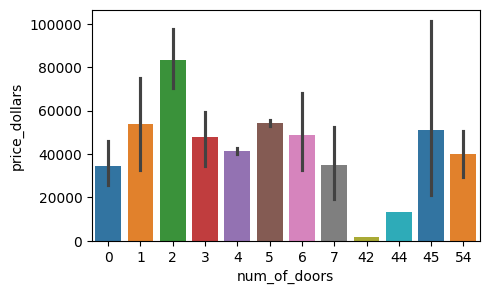

In [125]:
plt.figure(figsize=(5,3))
sns.barplot(x='num_of_doors',y='price_dollars',data=eda_data,palette=color)

<Axes: xlabel='seating_capacity', ylabel='price_dollars'>

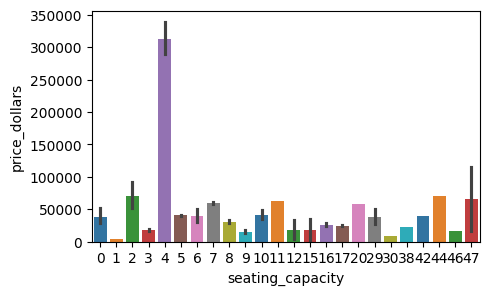

In [126]:
plt.figure(figsize=(5,3))
sns.barplot(x='seating_capacity',y='price_dollars',data=eda_data,palette=color)

In [127]:
eda_data['year_of_manufacture']=eda_data.year_of_manufacture.astype('int64')

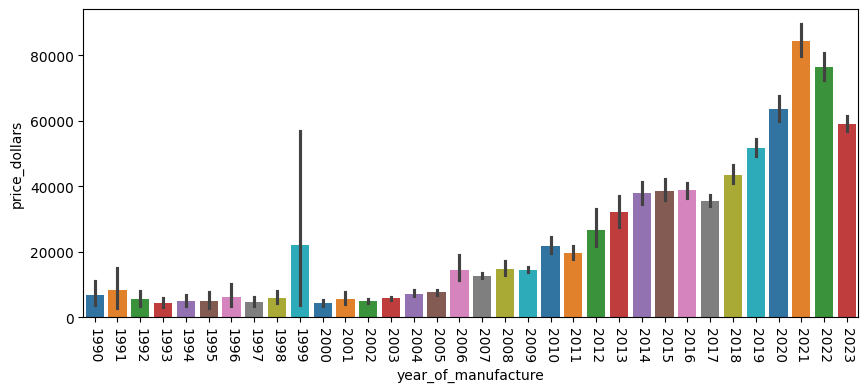

In [128]:
plt.figure(figsize=(10,4))
plot=sns.barplot(x='year_of_manufacture',y='price_dollars',data=eda_data,palette=color)
plot.tick_params(axis='x',rotation=270)
plt.show()

<Axes: xlabel='engine_capacity', ylabel='price_dollars'>

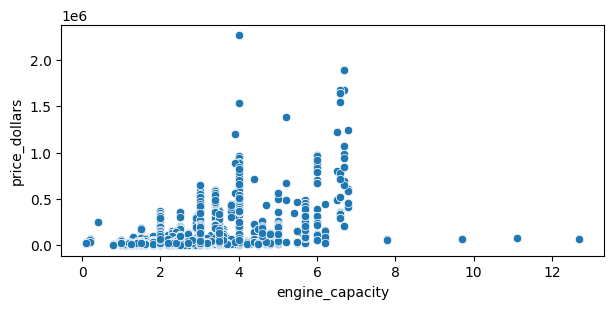

In [129]:
plt.figure(figsize=(7,3))
sns.scatterplot(x='engine_capacity',y='price_dollars',data=eda_data)

<Axes: xlabel='fuel_per_100km', ylabel='price_dollars'>

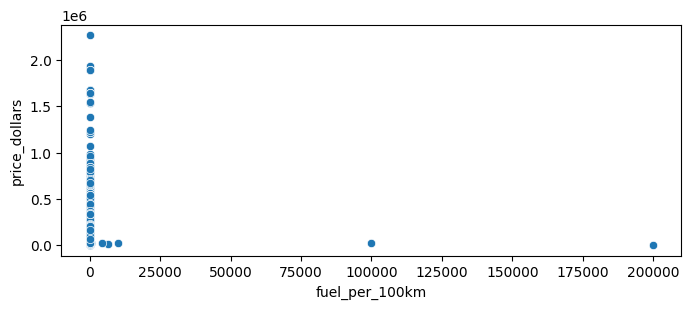

In [130]:
plt.figure(figsize=(8,3))
sns.scatterplot(x='fuel_per_100km',y='price_dollars',data=eda_data)

<Axes: xlabel='fuel_per_100km', ylabel='price_dollars'>

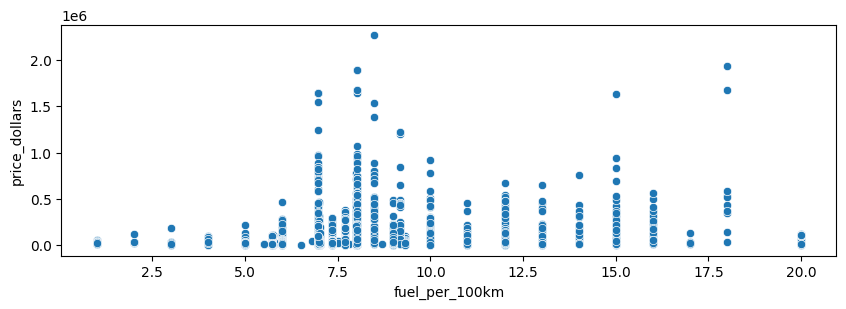

In [131]:
plt.figure(figsize=(10,3))
sns.scatterplot(x='fuel_per_100km',y='price_dollars',data=eda_data[eda_data.fuel_per_100km<40],)

In [132]:
eda_data.select_dtypes(include='object').columns

Index(['origin', 'condition', 'car_model', 'exterior_color', 'interior_color',
       'engine', 'transmission', 'drive_type', 'fuel_consumption', 'describe',
       'brand', 'grade', 'car_name', 'price', 'changed_price', 'engine_type'],
      dtype='object')

<Axes: xlabel='price_dollars', ylabel='origin'>

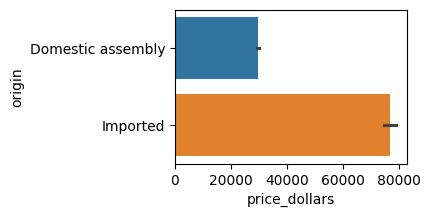

In [133]:
plt.figure(figsize=(3,2))
sns.barplot(x='price_dollars',y='origin',data=eda_data,palette=sns.color_palette())

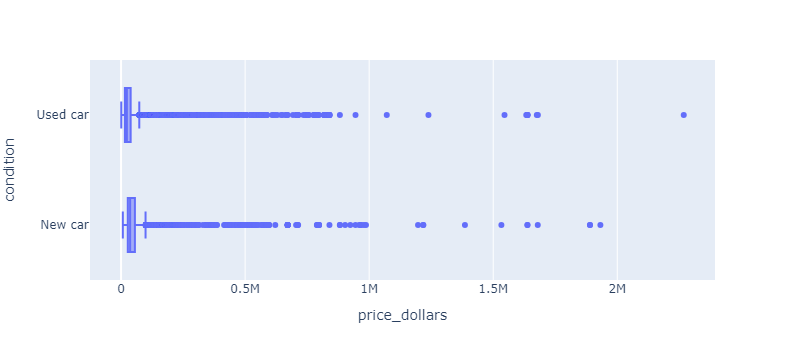

In [134]:
px.box(y='condition',x='price_dollars',data_frame=eda_data)

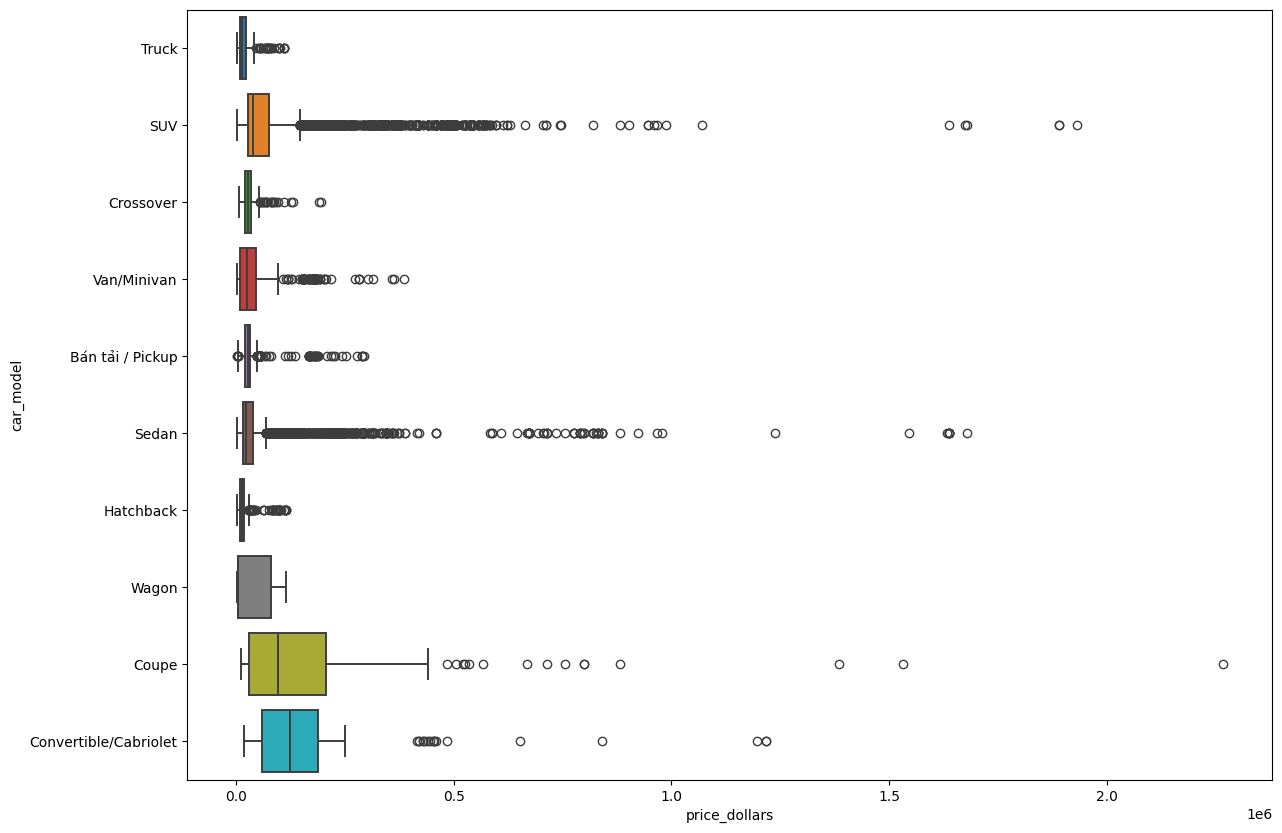

In [135]:
plt.figure(figsize=(14,10))
fig=sns.boxplot(y='car_model',x='price_dollars',data=eda_data,palette=color,linewidth=1.4)
plt.show()

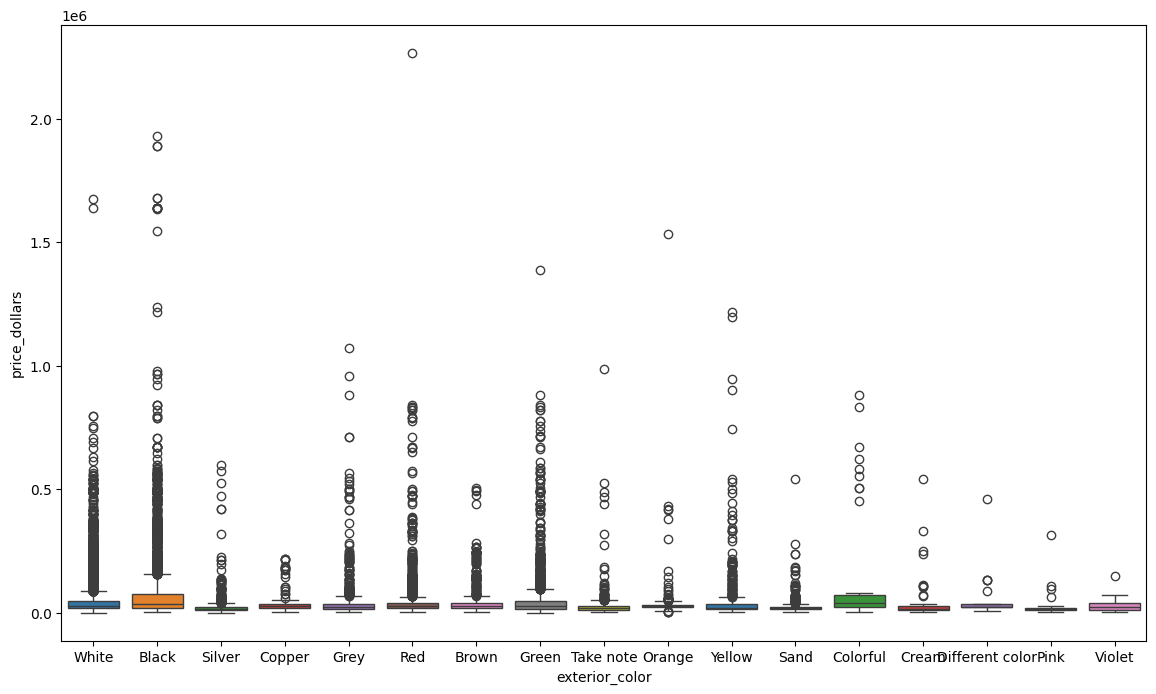

In [136]:
plt.figure(figsize=(14,8))
fig=sns.boxplot(x='exterior_color',y='price_dollars',data=eda_data,palette=color)
plt.show()

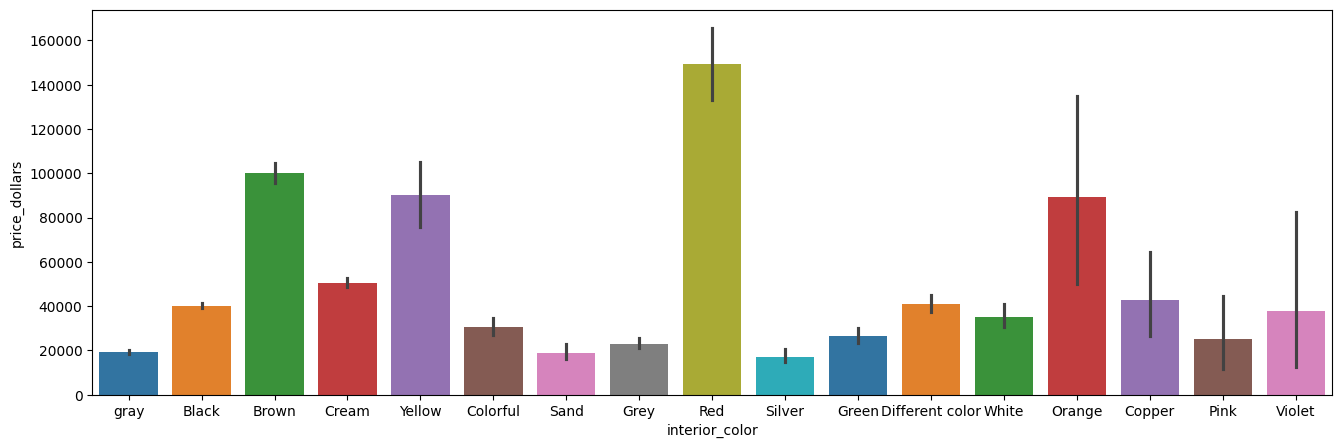

In [137]:
plt.figure(figsize=(16,5))
fig=sns.barplot(x='interior_color',y='price_dollars',data=eda_data,palette=color)
plt.show()

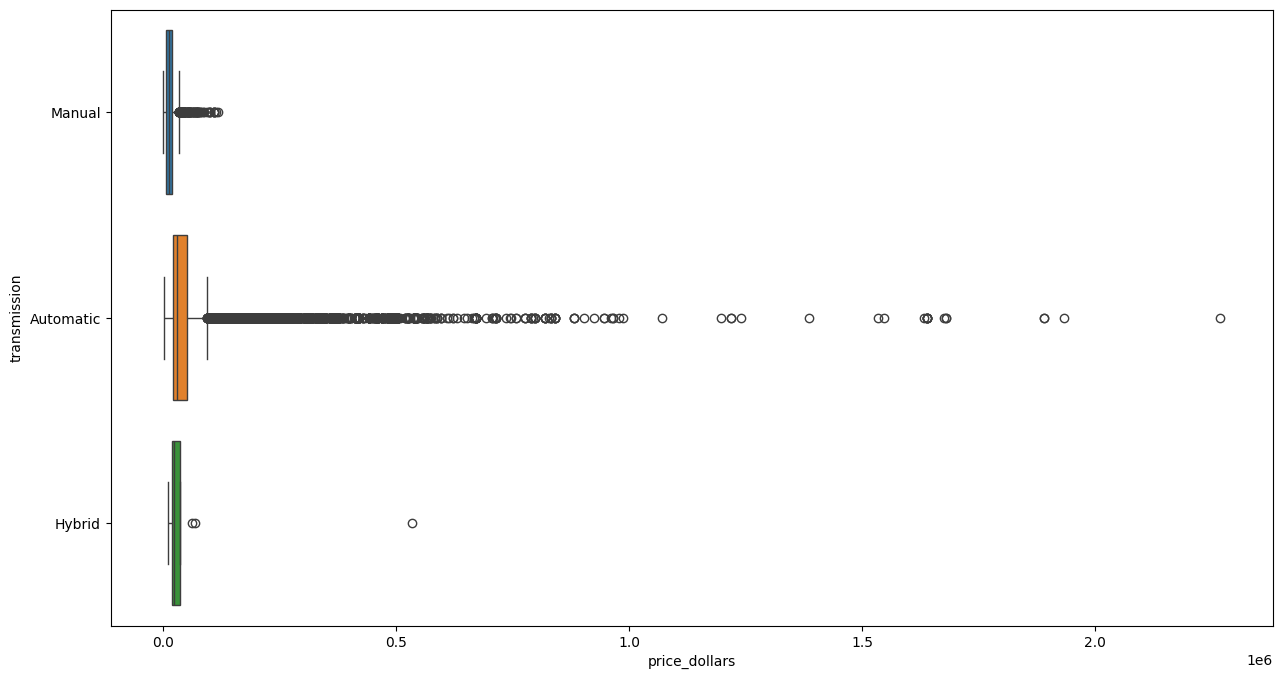

In [138]:
plt.figure(figsize=(15,8))
fig=sns.boxplot(y='transmission',x='price_dollars',data=eda_data,palette=color)
plt.show()

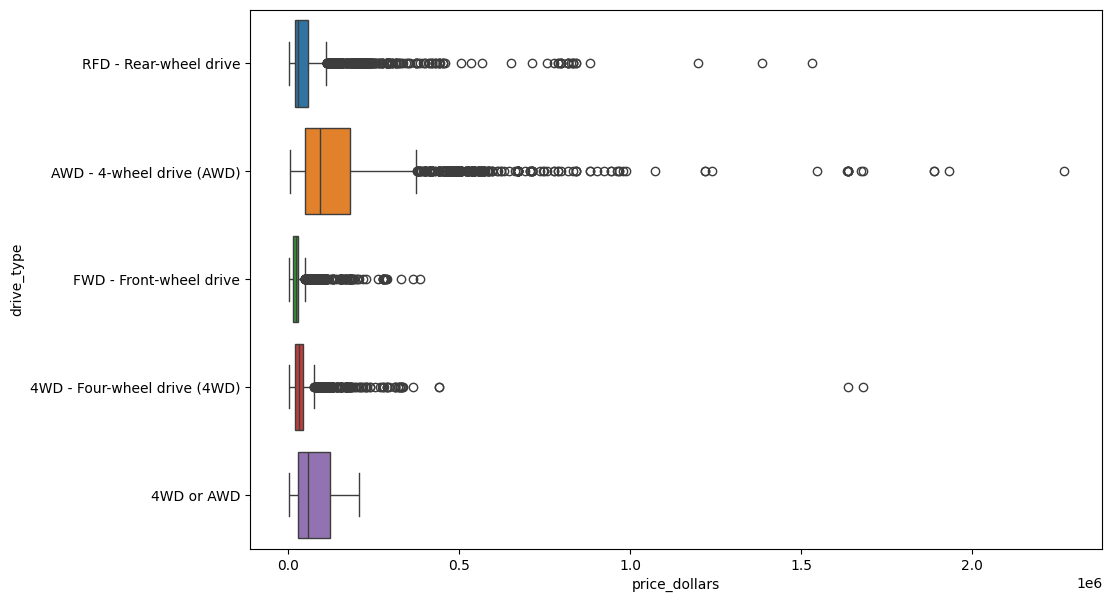

In [139]:
plt.figure(figsize=(11,7))
fig=sns.boxplot(y='drive_type',x='price_dollars',data=eda_data,palette=color)
plt.show()

In [140]:
fig=px.box(x='grade',y='price_dollars',animation_frame='brand',data_frame=eda_data,range_y=[0,1.3e5])

In [141]:
# slowing down the animation for clearer look
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1000
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 0.001

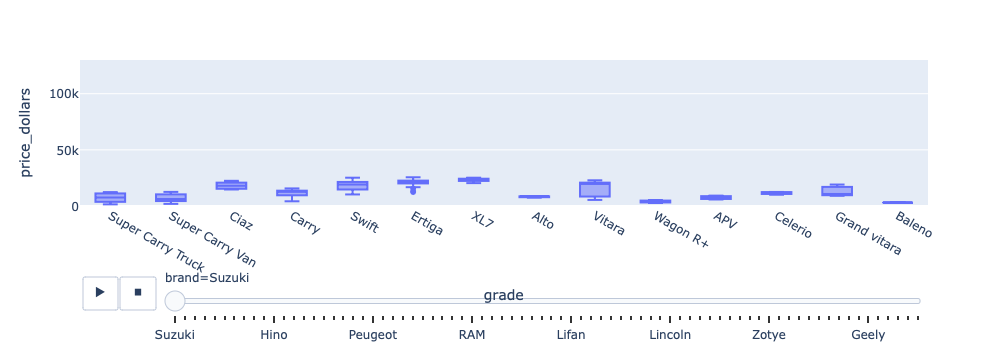

In [142]:
fig.show()

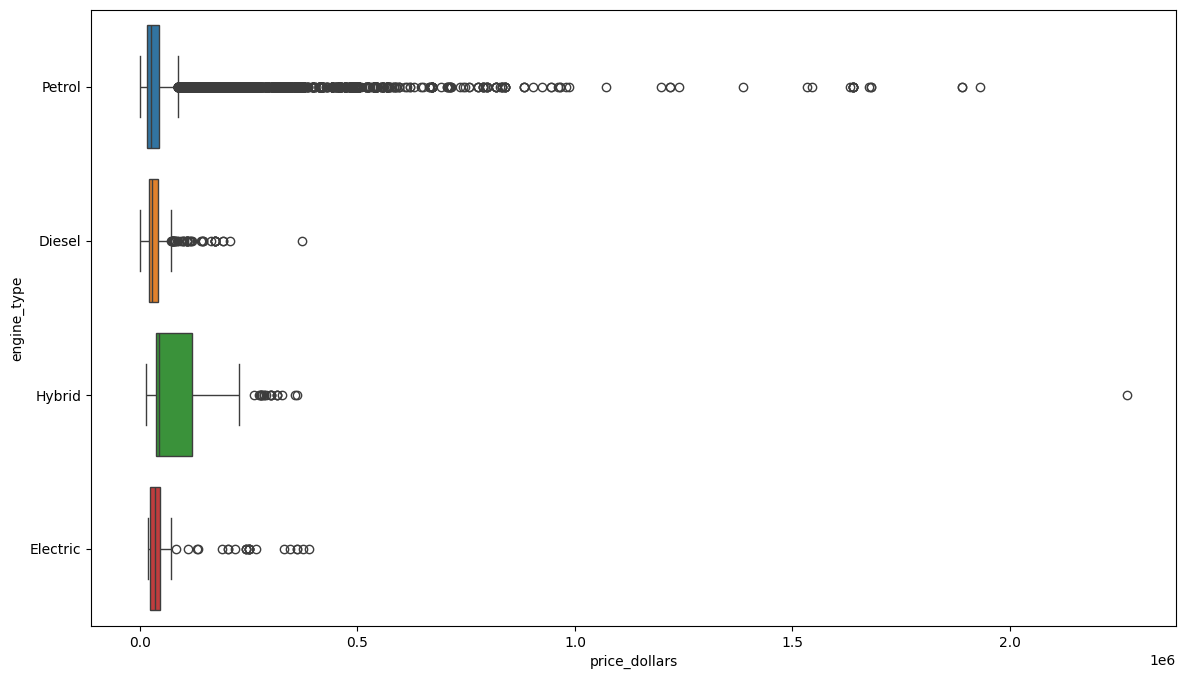

In [143]:
plt.figure(figsize=(14,8))
fig=sns.boxplot(y='engine_type',x='price_dollars',data=eda_data,palette=sns.color_palette())
plt.show()

In [144]:
plot_data=eda_data.groupby(['brand','car_model']).price_dollars.mean().reset_index()

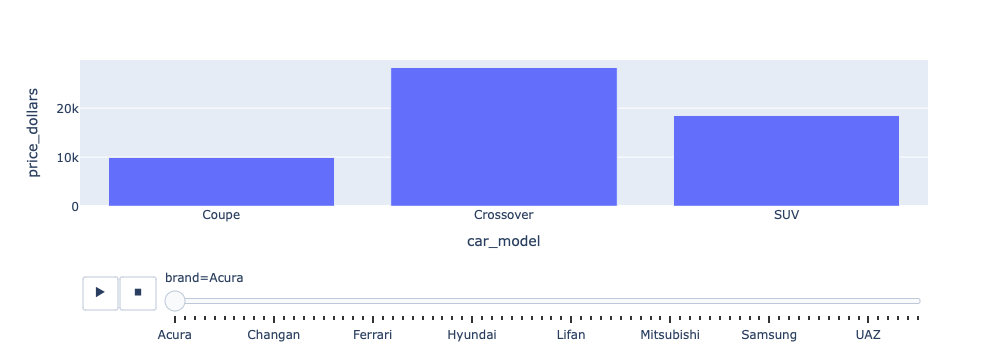

In [145]:
px.bar(x='car_model',y='price_dollars',animation_frame='brand',data_frame=plot_data)

<Axes: xlabel='brand', ylabel='grade'>

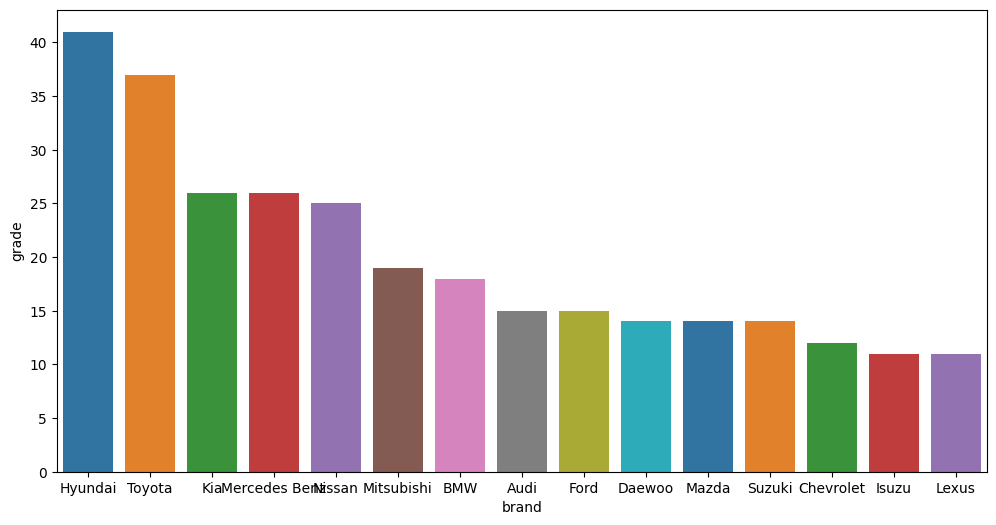

In [146]:
plt.figure(figsize=(12,6))
sns.barplot(data=eda_data.groupby('brand').grade.nunique().reset_index().nlargest(15,'grade'),
            x='brand',y='grade',palette=color)

<Axes: xlabel='brand', ylabel='grade'>

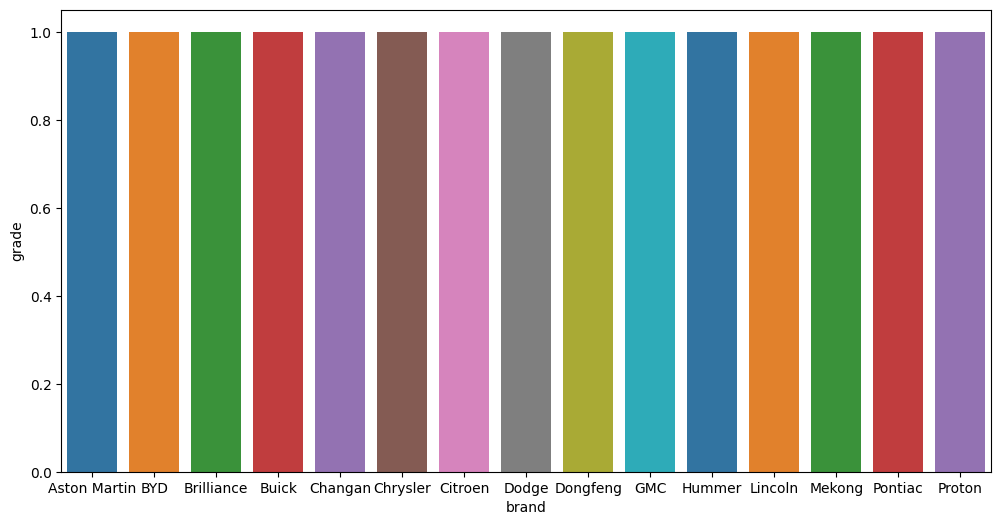

In [147]:
plt.figure(figsize=(12,6))
sns.barplot(data=eda_data.groupby('brand').grade.nunique().reset_index().nsmallest(15,'grade'),
            x='brand',y='grade',palette=color)

### <font color=D5B85A>EDA [with logged price values]

In [148]:
eda_data.select_dtypes(include=['int64','float64']).columns

Index(['ad_id', 'mileage', 'num_of_doors', 'seating_capacity',
       'year_of_manufacture', 'car_price', 'price_dollars', 'engine_capacity',
       'fuel_per_100km', 'price_log'],
      dtype='object')

<Axes: xlabel='num_of_doors', ylabel='price_log'>

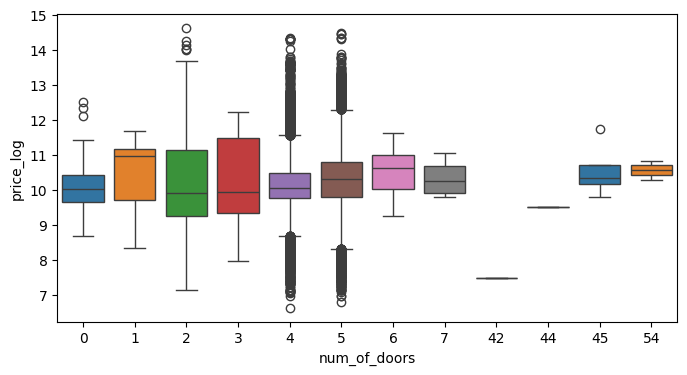

In [149]:
plt.figure(figsize=(8,4))
sns.boxplot(x='num_of_doors',y='price_log',data=eda_data,palette=color)

<Axes: xlabel='seating_capacity', ylabel='price_log'>

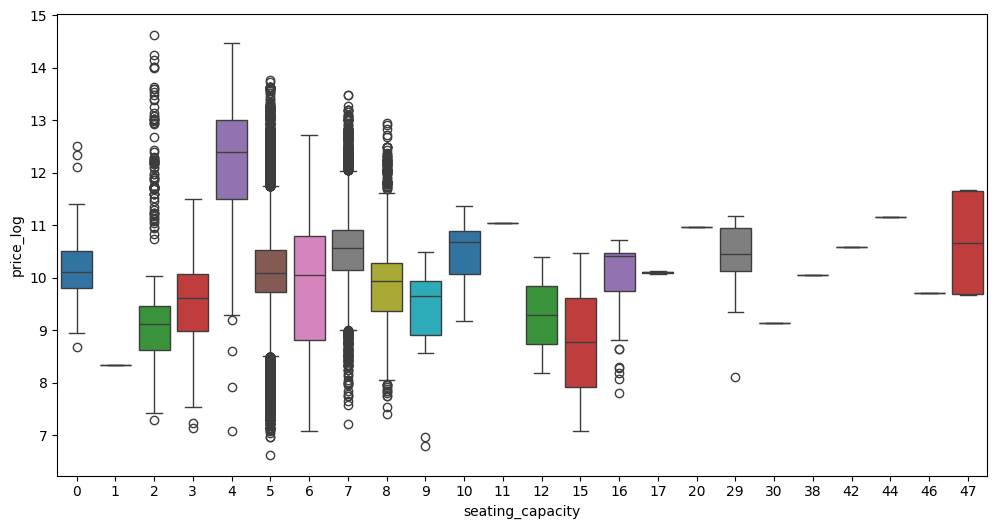

In [150]:
plt.figure(figsize=(12,6))
sns.boxplot(x='seating_capacity',y='price_log',data=eda_data,palette=color)

<Axes: xlabel='year_of_manufacture', ylabel='price_log'>

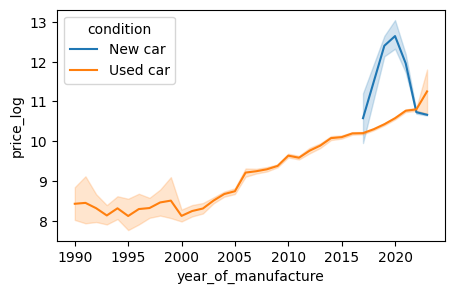

In [151]:
plt.figure(figsize=(5,3))
sns.lineplot(x='year_of_manufacture',y='price_log',data=eda_data,hue='condition')

<Axes: xlabel='engine_capacity', ylabel='price_log'>

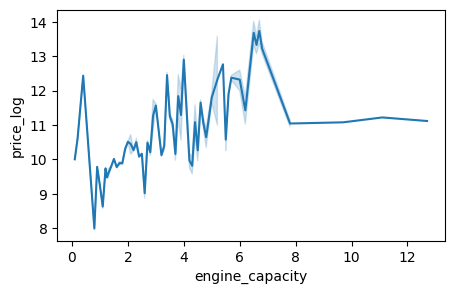

In [152]:
plt.figure(figsize=(5,3))
sns.lineplot(x='engine_capacity',y='price_log',data=eda_data)

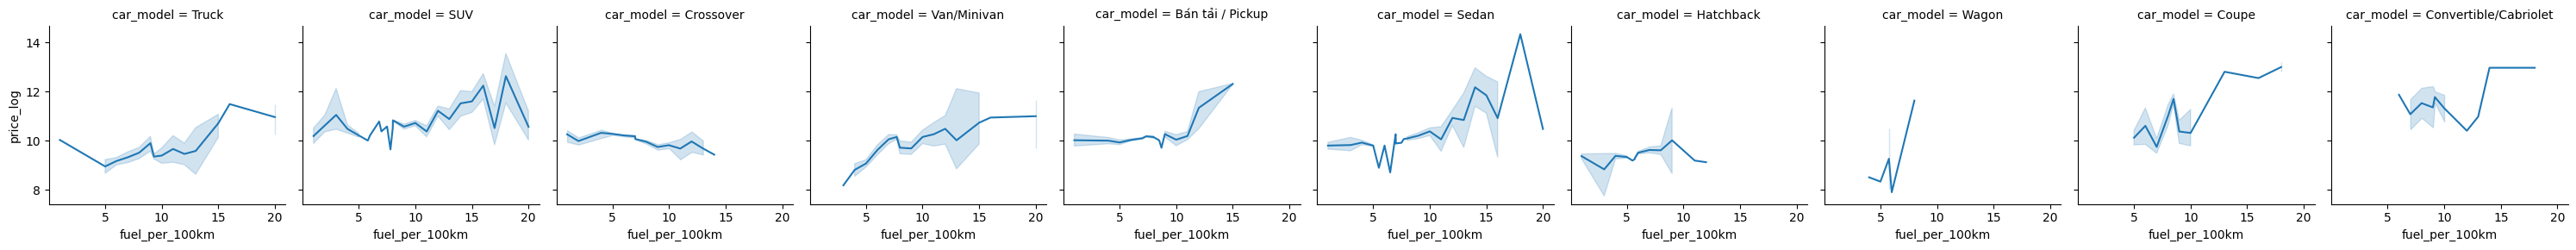

In [153]:
grid=sns.FacetGrid(eda_data[eda_data.fuel_per_100km<40],col='car_model')
grid.map(sns.lineplot,'fuel_per_100km','price_log')

<Axes: xlabel='origin', ylabel='price_log'>

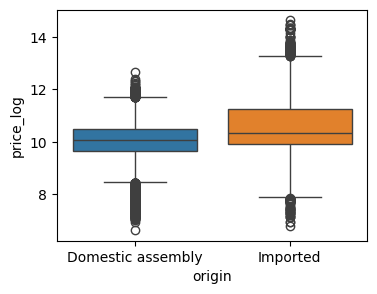

In [154]:
plt.figure(figsize=(4,3))
sns.boxplot(x='origin',y='price_log',data=eda_data,palette=color)

<Axes: xlabel='condition', ylabel='price_log'>

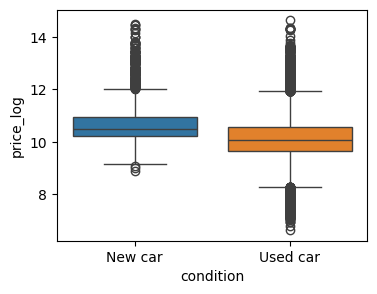

In [155]:
plt.figure(figsize=(4,3))
sns.boxplot(x='condition',y='price_log',data=eda_data,palette=color)

<Axes: xlabel='price_log', ylabel='car_model'>

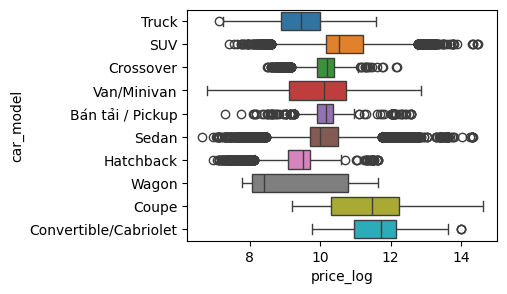

In [156]:
plt.figure(figsize=(4,3))
sns.boxplot(y='car_model',x='price_log',data=eda_data,palette=color)

<Axes: xlabel='transmission', ylabel='price_log'>

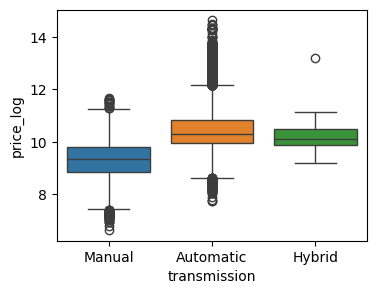

In [157]:
plt.figure(figsize=(4,3))
sns.boxplot(x='transmission',y='price_log',data=eda_data,palette=color)

### <font color=D5B85A> Finding and Removing Outliers and Cleaning Data

#### <font color= FF7F50> Finding and removing brand and grade values which are in very less quantity and would not be very useful in predicting prices
- 1st copy of eda_data

In [126]:
req_data=eda_data.copy()

In [127]:
req_data.shape[0]

30618

In [128]:
req_data['brand_grade']=req_data.brand+'_'+req_data.grade

In [129]:
req_data['extracted_name']=req_data.car_name.str.replace('car|Car','').\
apply(lambda x : re.split(re.compile(r'\b\d{4}\b'),x)[0]).\
apply(lambda x : re.sub(re.compile(r'\d+\.\d+'),'',x)).str.strip(' ')

In [130]:
req_data.extracted_name

0         Suzuki Super Carry Truck  MT
1              Toyota Land Cruiser  V6
2                  Toyota Innova G  AT
3               Toyota Corolla Cross G
4                  Toyota Innova G  AT
                     ...              
30613                Nissan X trail AT
30614                     Lexus ES 250
30615    Ford Ranger Wildtrack  4x4 AT
30616            Mercedes Benz GLC 200
30617     Audi Q8 55 TFSI S-Line Quatt
Name: extracted_name, Length: 30618, dtype: object

In [131]:
table=(req_data.brand_grade.value_counts()*100/req_data.shape[0]).reset_index()

In [132]:
filter_list=table[~(table['count']<0.03)]['brand_grade'].to_list()

In [133]:
filter_index=req_data[~(req_data.brand_grade.isin(filter_list))].index.tolist()

In [134]:
data_1=req_data.copy()

In [135]:
data_1.loc[filter_index,'grade']='other'

In [136]:
data_1.shape[0]-req_data.shape[0]

0

In [137]:
data_1['brand_grade']=data_1.brand+'_'+data_1.grade

In [138]:
table=(data_1.brand_grade.value_counts()*100/data_1.shape[0]).reset_index()

In [139]:
filter_list=table[~(table['count']<0.03)]['brand_grade'].to_list()

In [140]:
data_1=data_1[data_1.brand_grade.isin(filter_list)]

In [141]:
data_1.shape[0]-req_data.shape[0]

-193

#### <font color= FF7F50> exploring for more outliers
- checking by car_model first for num_of_doors and seating_capacity outliers and may be change it
- starting with num_of_doors

<Axes: xlabel='car_model', ylabel='num_of_doors'>

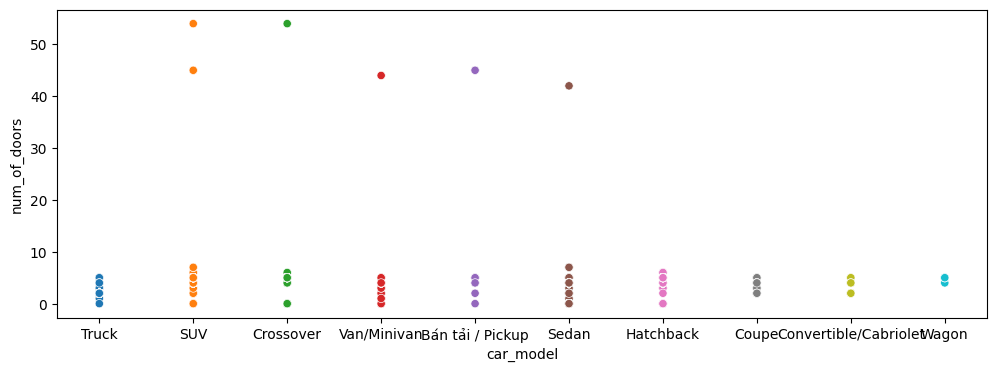

In [142]:
plt.figure(figsize=(12,4))
sns.scatterplot(x='car_model',y='num_of_doors',data=data_1,hue='car_model',legend=False)

In [143]:
num_of_doors_outliers=data_1[(~data_1.car_model.isin(['Hatchback','Convertible/Cabriolet','Coupe']))
       &(data_1.num_of_doors>15)]

In [144]:
data_2=data_1.drop(num_of_doors_outliers.index.to_list()).reset_index(drop=True)

In [145]:
data_2.shape[0]-data_1.shape[0]

-8

In [146]:
doors_table=data_2.groupby('brand_grade').num_of_doors.agg(pd.Series.mode).reset_index()

In [147]:
doors_table[doors_table.num_of_doors.apply(lambda x : type(x)==np.ndarray)]

brand_grade num_of_doors
132      Lexus_IS       [2, 4]
250  Toyota_other       [4, 5]

In [148]:
doors_table.at[132,'num_of_doors']=4
doors_table.at[250,'num_of_doors']=5

In [149]:
index_doors=data_2[data_2.num_of_doors==0].index.to_list()

In [150]:
values_doors=data_2[data_2.num_of_doors==0].merge(doors_table,on='brand_grade',how='left')\
.num_of_doors_y.to_list()

In [151]:
data_3=data_2.copy()

In [152]:
data_3.loc[index_doors,'num_of_doors']=values_doors

In [153]:
data_3[data_3.num_of_doors==0].shape[0]

0

#### <font color= FF7F50> seating capacity outliers

<Axes: xlabel='car_model', ylabel='seating_capacity'>

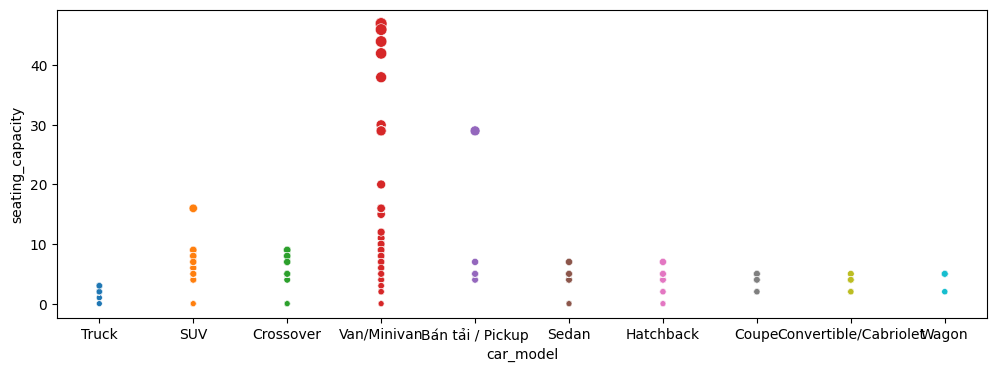

In [186]:
plt.figure(figsize=(12,4))
sns.scatterplot(x='car_model',y='seating_capacity',data=data_3,hue='car_model',legend=False,
                size='seating_capacity')

In [154]:
data_3['zscore']=data_3.groupby('extracted_name').seating_capacity.transform(zscore).fillna(0)

In [155]:
seating_index=data_3[~(data_3.zscore.between(-1,1)) | (data_3.seating_capacity==0)].index.to_list()

In [156]:
seating_table=data_3.groupby('extracted_name').seating_capacity\
.agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()\
.rename(columns={0:'occurences'})

In [157]:
seating_table.seating_capacity=\
seating_table.seating_capacity.apply(lambda x : int(x[1]) if type(x)==np.ndarray else x)

In [158]:
values_seating=data_3[~(data_3.zscore.between(-1,1)) | (data_3.seating_capacity==0)].\
merge(seating_table,on='extracted_name',how='left').seating_capacity_y.to_list()

In [159]:
data_4=data_3.copy()

In [160]:
data_4.loc[seating_index,'seating_capacity']=values_seating

In [161]:
data_4.loc[data_4[data_4.seating_capacity==0].index.to_list(),'seating_capacity']=7

### <font color=D5B85A> Filling engine_capacity with ML

#### <font color= FF7F50> predicting values

In [162]:
out_data=data_4.copy()

In [163]:
#car_data.csv == data_4

In [164]:
#out_data=out_data.drop(columns='Unnamed: 0')

In [165]:
out_data.shape[0]

30417

In [166]:
def filter_outlier(data):
    filter_data=data.copy()
    filter_data['zscore']=filter_data.groupby(['extracted_name','brand_grade','year_of_manufacture'])\
    ['price_dollars'].transform(zscore)
    filter_data=filter_data[(filter_data.zscore.between(-2.5,2.5)) | (filter_data.zscore.isnull())]
    return(filter_data)

In [167]:
out=filter_outlier(out_data)

In [168]:
out.shape

(30027, 30)

In [169]:
#out.drop(index=out[~(out.zscore.between(-2.5,2.5))& ~(out.zscore.isnull())].index.to_list(),inplace=True)

In [170]:
out.extracted_name

0         Suzuki Super Carry Truck  MT
1              Toyota Land Cruiser  V6
2                  Toyota Innova G  AT
3               Toyota Corolla Cross G
4                  Toyota Innova G  AT
                     ...              
30412                Nissan X trail AT
30413                     Lexus ES 250
30414    Ford Ranger Wildtrack  4x4 AT
30415            Mercedes Benz GLC 200
30416     Audi Q8 55 TFSI S-Line Quatt
Name: extracted_name, Length: 30027, dtype: object

In [171]:
out=out.reset_index(drop=True)

In [172]:
out.shape[0]-out_data.shape[0]

-390

In [174]:
out.columns

Index(['ad_id', 'origin', 'condition', 'car_model', 'mileage',
       'exterior_color', 'interior_color', 'num_of_doors', 'seating_capacity',
       'engine', 'transmission', 'drive_type', 'fuel_consumption', 'describe',
       'brand', 'grade', 'year_of_manufacture', 'car_name', 'price',
       'changed_price', 'car_price', 'price_dollars', 'engine_type',
       'engine_capacity', 'fuel_per_100km', 'year_of_manufactue', 'price_log',
       'brand_grade', 'extracted_name', 'zscore'],
      dtype='object')

In [175]:
model_data=out[['origin','condition','car_model','mileage','exterior_color',
                'interior_color','num_of_doors','seating_capacity','transmission',
                'drive_type','year_of_manufacture','price_dollars','engine_type','engine_capacity',
                'fuel_per_100km','brand_grade']]

In [176]:
model_data=pd.get_dummies(model_data,drop_first=True)

In [177]:
#scaler=MinMaxScaler()

In [178]:
#model_data[['mileage', 'num_of_doors', 'seating_capacity', 'year_of_manufacture',
 #      'price_dollars', 'engine_capacity', 'fuel_per_100km']]=\
#scaler.fit_transform(model_data.select_dtypes(include=['int64','float64']))

In [179]:
X_train=model_data[model_data.engine_capacity.notnull()].drop(columns='engine_capacity')
y_train=model_data[model_data.engine_capacity.notnull()][['engine_capacity']]

In [180]:
X_test=model_data[model_data.engine_capacity.isnull()].drop(columns='engine_capacity')
y_test=model_data[model_data.engine_capacity.isnull()][['engine_capacity']]

In [181]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.15)

In [182]:
forest=RandomForestRegressor(random_state=73)

In [183]:
forest.fit(X_train,y_train)

RandomForestRegressor(random_state=73)

In [184]:
forest.score(X_val,y_val)

0.9401080404008988

In [185]:
y_pred=forest.predict(X_val)

In [186]:
round(mape(y_val,y_pred),6)

0.023388

In [187]:
pd.DataFrame(y_val.engine_capacity.tolist()-y_pred)[0].value_counts().nlargest(10)

0
 0.000000e+00    1466
 3.996803e-15      90
-3.996803e-15      83
-1.998401e-15      69
-2.664535e-15      61
 4.884981e-15      41
-1.000000e-02      39
-5.000000e-03      36
 3.108624e-15      33
 2.886580e-15      33
Name: count, dtype: int64

In [188]:
capacity_values=forest.predict(X_test).tolist()

In [189]:
feature_importance=pd.DataFrame(X_train.columns,forest.feature_importances_).reset_index()\
.rename(columns={'index':'importance',0:'feature'}).nlargest(10,'importance')

<Axes: xlabel='importance', ylabel='feature'>

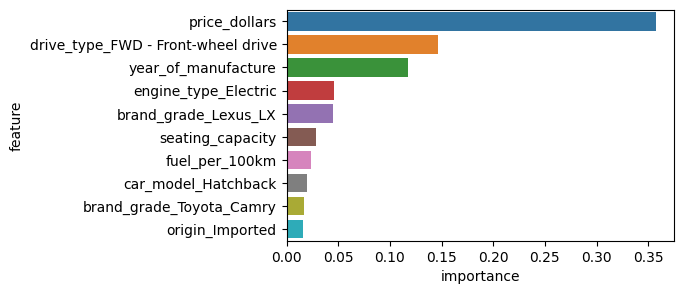

In [190]:
plt.figure(figsize=(5,3))
sns.barplot(x='importance',y='feature',palette=color,data=feature_importance)

In [191]:
complete_data=out.copy()

#### <font color= FF7F50> Cleaning Engine Capacity Values

In [192]:
complete_data.loc[y_test.index.to_list(),'engine_capacity']=capacity_values

In [193]:
def filter_engine(data):
    final=pd.DataFrame()
    for keys,df in data.groupby(['brand_grade','year_of_manufacture']):
        df['zscore']=zscore(df.engine_capacity)
        final=pd.concat([final,df],ignore_index=True)
    return(final)

In [194]:
ll=filter_engine(complete_data)

In [195]:
index_capacity=ll[(ll.zscore.notnull())& ~(ll.zscore.between(-3,3))].index

In [196]:
table_capacity=complete_data.groupby('extracted_name').engine_capacity.agg(pd.Series.mode).reset_index()

In [197]:
table_capacity.engine_capacity=table_capacity.engine_capacity\
.apply(lambda x : x[1] if type(x)==np.ndarray else x)

In [198]:
values_capacity=complete_data.loc[index_capacity]\
.merge(table_capacity,on='extracted_name',how='inner').engine_capacity_y.to_list()

In [199]:
complete_data.loc[index_capacity,'engine_capacity']=values_capacity

### <font color=D5B85A> Feature Engineering

#### <font color= FF7F50> Making new features

In [200]:
vie_data=complete_data.copy()

In [201]:
#vie_data=pd.read_csv('car_data.csv')
#vie_data.drop(columns='Unnamed: 0',inplace=True)

In [202]:
vie_data.shape

(30027, 30)

In [203]:
current_year=datetime.now().year

In [204]:
#vie_data.drop(columns='Unnamed: 0',inplace=True)

In [205]:
vie_data['brand_grade']=vie_data.brand+'_'+vie_data.grade

In [206]:
vie_data['age']=current_year-vie_data.year_of_manufacture

#### <font color= FF7F50> Kmeans for brand encoding

In [267]:
price_kmeans=KMeans(n_clusters=10)

In [268]:
price_kmeans.fit(req_data[['price_dollars']])

KMeans(n_clusters=10)

In [269]:
all_predicted=price_kmeans.predict(req_data[['price_dollars']])

In [270]:
reference_table=pd.DataFrame(req_data.price_dollars.values,all_predicted.tolist())
reference_table=reference_table.reset_index().rename(columns={'index':'group_value',0:'price'})

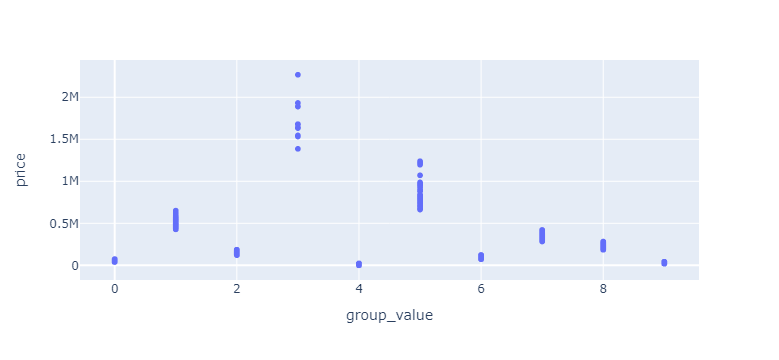

In [271]:
px.scatter(data_frame=reference_table,x='group_value',y='price')

In [272]:
kmean_lookup=reference_table.groupby('group_value').price.min().reset_index()\
.sort_values('price').reset_index(drop=True)

In [273]:
kmean_lookup['encoded']=[1,2,3,4,5,6,7,8,9,10]

In [274]:
kmean_lookup['price']=kmean_lookup.price.astype('float64')

In [275]:
kmean_lookup.loc[0,'price']=0

In [276]:
brand_data=vie_data.copy()

In [277]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in kf.split(brand_data):
    train_df, val_df = brand_data.iloc[train_index], brand_data.iloc[val_index]
    model_means = train_df.groupby('brand')['price_dollars'].mean()
    brand_data.loc[val_index, 'Model_Encoded'] = brand_data.loc[val_index, 'brand'].map(model_means)

In [278]:
brand_data.head(2)

ad_id             origin condition car_model  mileage exterior_color  \
0  17042  Domestic assembly   New car     Truck        0          White   
1  53794           Imported   New car       SUV        0          Black   

  interior_color  num_of_doors  seating_capacity         engine  ...  \
0           gray             2                 2  Petrol\t1.0 L  ...   
1          Black             5                 7  Petrol\t3.4 L  ...   

  engine_type engine_capacity fuel_per_100km year_of_manufactue  price_log  \
0      Petrol             1.0           9.31               2022   9.255123   
1      Petrol             3.4          10.00               2022  12.100779   

                brand_grade                extracted_name    zscore  age  \
0  Suzuki_Super Carry Truck  Suzuki Super Carry Truck  MT -0.301437  2.0   
1       Toyota_Land Cruiser       Toyota Land Cruiser  V6 -0.371352  2.0   

  Model_Encoded  
0  16368.102389  
1  34016.482476  

[2 rows x 32 columns]

In [279]:
by_brand=brand_data.groupby('brand').Model_Encoded.mean().reset_index().dropna()

In [280]:
by_brand=pd.merge_asof(by_brand.sort_values('Model_Encoded'),
              kmean_lookup[['price','encoded']],
              left_on='Model_Encoded',right_on='price')[['brand','encoded']]

In [281]:
grade_data=vie_data.copy()

In [282]:
grade_data['grade_extracted']=grade_data.T\
.apply(lambda x : re.sub(x.brand,'',x.extracted_name))

In [283]:
grade_data['grade_extracted']=grade_data.T.apply(lambda x : re.sub(x.grade,'',x.grade_extracted))

In [284]:
grade_data['grade_extracted']=grade_data.grade_extracted.str.strip(' ')

In [285]:
vie_data.loc[vie_data.index,'brand_code']=vie_data.loc[vie_data.index,'brand']\
.map(by_brand.groupby('brand').encoded.mean())

#### <font color= FF7F50> Creating Other as a grade value for each brand

In [286]:
other_grades=vie_data[~(vie_data.grade=='other')].brand.unique()+'_'+'other'

In [287]:
brand_grade_other=pd.DataFrame(np.concatenate((vie_data.brand_grade.unique(),other_grades)))

In [288]:
brand_grade_other=brand_grade_other.rename(columns={0:'brand_grade'})

In [289]:
brand_grade_other.loc[brand_grade_other.shape[0],'brand_grade']='other_other'

In [290]:
encoder_brand_grade=OneHotEncoder(drop='first')

In [291]:
encoder_brand_grade.fit(brand_grade_other[['brand_grade']])

OneHotEncoder(drop='first')

#### <font color= FF7F50> Selecting important features

In [292]:
model_data=vie_data[['origin','condition','car_model','mileage','exterior_color',
                'interior_color','seating_capacity','transmission',
                'drive_type','price_dollars','engine_type','engine_capacity','age',
                'brand_code','brand_grade']]

<Axes: >

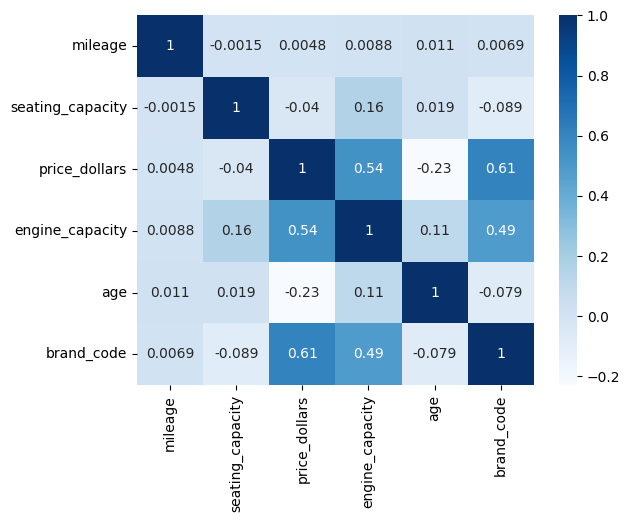

In [293]:
sns.heatmap(model_data.select_dtypes(exclude='object').corr(),annot=True,cmap='Blues')

In [294]:
encoder_except_brand_grade=OneHotEncoder(drop='first')

In [295]:
brand_grade_encoded=encoder_brand_grade.transform(model_data[['brand_grade']]).toarray()

In [296]:
other_data_encoded=\
encoder_except_brand_grade.fit_transform(model_data.drop(columns='brand_grade').\
                                         select_dtypes(include='object')).toarray()

In [297]:
scaler=MinMaxScaler()

In [298]:
model_data['mileage']=scaler.fit_transform(model_data[['mileage']])

In [299]:
price_prediction_data=pd.concat(
    [model_data.select_dtypes(exclude='object'),
     pd.DataFrame(other_data_encoded,columns=encoder_except_brand_grade.get_feature_names_out()),
     pd.DataFrame(brand_grade_encoded,columns=encoder_brand_grade.get_feature_names_out())],axis=1)

In [300]:
price_prediction_data.isnull().any().sum()

0

In [301]:
X=price_prediction_data.drop(columns='price_dollars')
y=price_prediction_data[['price_dollars']]

In [302]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [303]:
X_val,X_test,y_val,y_test=train_test_split(X_test,y_test,test_size=0.5)

#### <font color= FF7F50> Random Forest Model

In [311]:
forest_model=RandomForestRegressor(random_state=73)

In [312]:
forest_model.fit(X_train,y_train)

RandomForestRegressor(random_state=73)

In [313]:
forest_model.score(X_train,y_train)

0.9943095860744195

In [314]:
forest_model.score(X_val,y_val)

0.940256381112631

In [315]:
forest_model.score(X_test,y_test)

0.9430677060892094

In [316]:
y_pred_all=forest_model.predict(X)

In [317]:
mae(y,y_pred_all)

2246.1031853493396

In [318]:
feature_importance=pd.DataFrame(X.columns,forest_model.feature_importances_).reset_index()\
.rename(columns={'index':'importance',0:'feature'}).nlargest(10,'importance')

<Axes: xlabel='importance', ylabel='feature'>

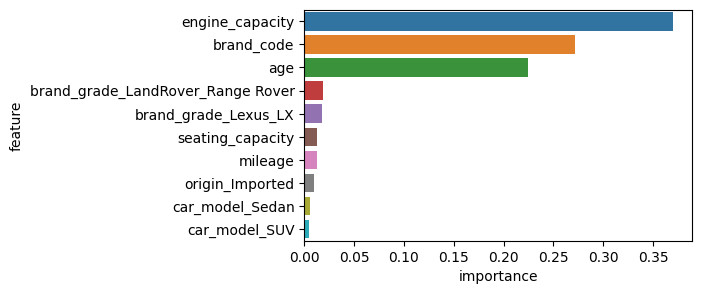

In [319]:
plt.figure(figsize=(5,3))
sns.barplot(x='importance',y='feature',palette=color,data=feature_importance)

In [320]:
ff=pd.DataFrame(y.price_dollars.tolist(),y_pred_all.tolist()).reset_index()

In [321]:
ff=ff.rename(columns={'index':'pred',0:'test'})

In [322]:
ff['change']=(ff.pred-ff.test)/ff.test

In [323]:
index_check=ff[~(ff.change.between(-0.15,0.15))].index.tolist()

In [324]:
plot_data=vie_data.loc[index_check]

In [325]:
plot_data.brand_grade.value_counts().nlargest(10)

brand_grade
Toyota_Innova            60
Mercedes Benz_E class    57
Daewoo_Matiz             43
Ford_Ranger              35
Chevrolet_Spark          33
Mercedes Benz_Maybach    33
Kia_Morning              31
Mercedes Benz_S class    30
LandRover_Range Rover    26
Mercedes Benz_GLC        26
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Count'>

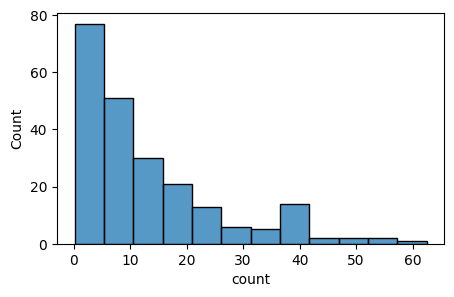

In [326]:
plt.figure(figsize=(5,3))
sns.histplot(plot_data.brand_grade.value_counts()*100/vie_data.brand_grade.value_counts())

<Axes: xlabel='age', ylabel='count'>

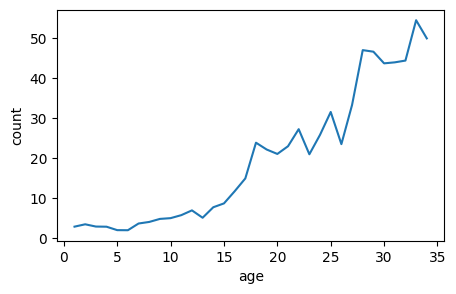

In [327]:
plt.figure(figsize=(5,3))
sns.lineplot(plot_data.age.value_counts()*100/vie_data.age.value_counts())

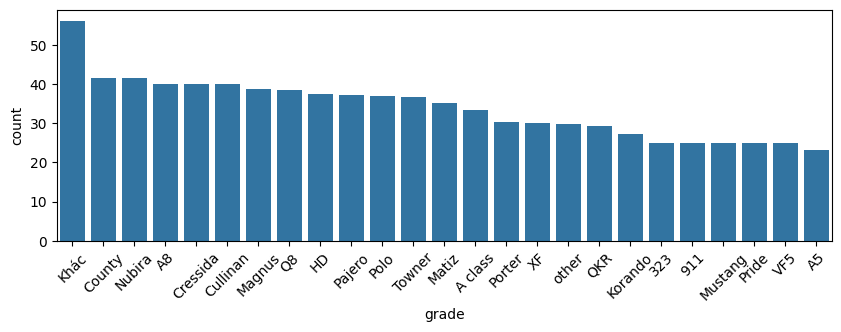

In [328]:
plt.figure(figsize=(10,3))
sns.barplot((plot_data.grade.value_counts()*100/vie_data.grade.value_counts()).nlargest(25))
plt.xticks(rotation=45)
plt.show()

#### <font color= FF7F50> XGBoost model

In [329]:
xgboost_price=XGBRegressor(random_state=20)

In [330]:
xgboost_price.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=20, ...)

In [331]:
xgboost_price.score(X_train,y_train)

0.9882083367615626

In [332]:
xgboost_price.score(X_val,y_val)

0.9387937210366486

In [333]:
xgboost_price.score(X_test,y_test)

0.9609288859443279

In [334]:
feature_importance=pd.DataFrame(X.columns,xgboost_price.feature_importances_).reset_index()\
.rename(columns={'index':'importance',0:'feature'}).nlargest(10,'importance')

<Axes: xlabel='importance', ylabel='feature'>

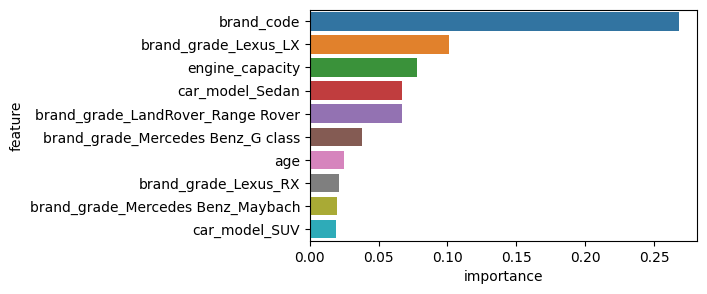

In [335]:
plt.figure(figsize=(5,3))
sns.barplot(x='importance',y='feature',palette=color,data=feature_importance)

In [336]:
y_pred_all=xgboost_price.predict(X)

In [337]:
mae(y,y_pred_all)

4077.859356366461

In [338]:
ff=pd.DataFrame(y.price_dollars.tolist(),y_pred_all.tolist()).reset_index()

In [339]:
ff=ff.rename(columns={'index':'pred',0:'test'})

In [340]:
ff['change']=(ff.test-ff.pred)/ff.test

In [341]:
index_check=ff[~(ff.change.between(-0.15,0.15))].index.tolist()

In [342]:
plot_data=vie_data.loc[index_check]

<Axes: xlabel='count', ylabel='Count'>

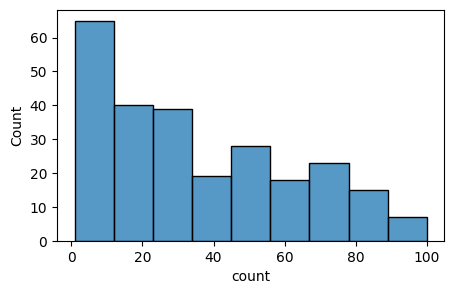

In [343]:
plt.figure(figsize=(5,3))
sns.histplot(plot_data.brand_grade.value_counts()*100/vie_data.brand_grade.value_counts())

In [344]:
plot_data.brand_grade.value_counts()

brand_grade
Ford_Ranger              384
Kia_Morning              382
Toyota_Innova            214
Mercedes Benz_C class    206
Hyundai_i10              176
                        ... 
Volvo_S90                  1
Nissan_Almera              1
Honda_Jazz                 1
Lexus_other                1
Toyota_Raize               1
Name: count, Length: 254, dtype: int64

<Axes: xlabel='age', ylabel='count'>

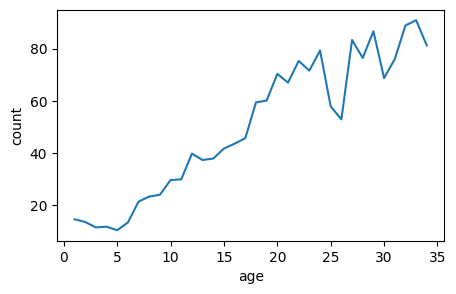

In [345]:
plt.figure(figsize=(5,3))
sns.lineplot(plot_data.age.value_counts()*100/vie_data.age.value_counts())

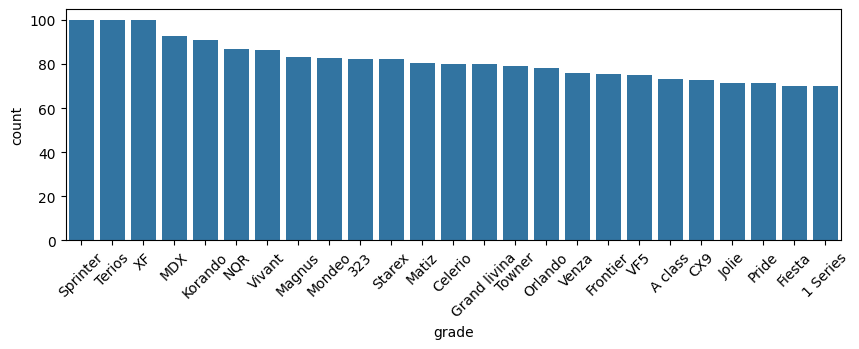

In [346]:
plt.figure(figsize=(10,3))
sns.barplot((plot_data.grade.value_counts()*100/vie_data.grade.value_counts()).nlargest(25))
plt.xticks(rotation=45)
plt.show()

#### <font color= FF7F50> Decision Tree

In [381]:
tree_price=DecisionTreeRegressor(random_state=545)

In [382]:
tree_price.fit(X_train,y_train)

DecisionTreeRegressor(random_state=545)

In [383]:
tree_price.score(X_train,y_train)

0.9983853087734887

In [384]:
tree_price.score(X_val,y_val)

0.9430998600715007

In [385]:
tree_price.score(X_test,y_test)

0.9124975634003817

In [386]:
y_pred_all=tree_price.predict(X)

In [387]:
mae(y,y_pred_all)

1526.0912363927648

In [388]:
feature_importance=pd.DataFrame(X.columns,tree_price.feature_importances_).reset_index()\
.rename(columns={'index':'importance',0:'feature'}).nlargest(10,'importance')

<Axes: xlabel='importance', ylabel='feature'>

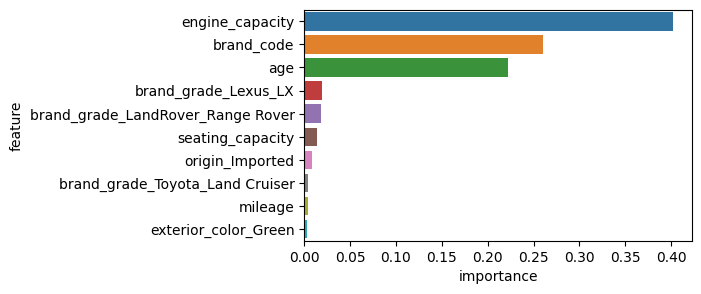

In [389]:
plt.figure(figsize=(5,3))
sns.barplot(x='importance',y='feature',palette=color,data=feature_importance)

In [390]:
ff=pd.DataFrame(y.price_dollars.tolist(),y_pred_all.tolist()).reset_index()

In [391]:
ff=ff.rename(columns={'index':'pred',0:'test'})

In [392]:
ff['change']=(ff.pred-ff.test)/ff.test

In [393]:
index_check=ff[~(ff.change.between(-0.15,0.15))].index.tolist()

In [394]:
plot_data=vie_data.loc[index_check]

In [395]:
plot_data.brand_grade.value_counts()

brand_grade
Toyota_Innova              62
Mercedes Benz_E class      59
Ford_Ranger                41
Kia_Morning                39
Chevrolet_Spark            33
                           ..
Mercedes Benz_GLK Class     1
Audi_Q5                     1
Honda_Brio                  1
Kia_Picanto                 1
Hyundai_Kona                1
Name: count, Length: 220, dtype: int64

<Axes: xlabel='count', ylabel='Count'>

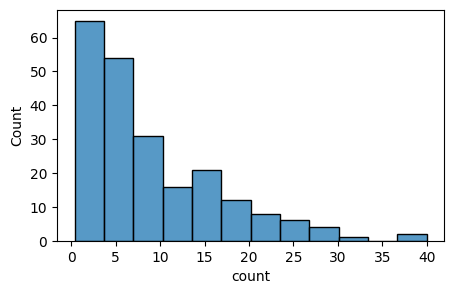

In [396]:
plt.figure(figsize=(5,3))
sns.histplot(plot_data.brand_grade.value_counts()*100/vie_data.brand_grade.value_counts())

<Axes: xlabel='age', ylabel='count'>

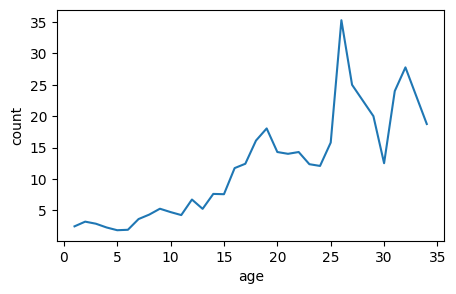

In [397]:
plt.figure(figsize=(5,3))
sns.lineplot(plot_data.age.value_counts()*100/vie_data.age.value_counts())

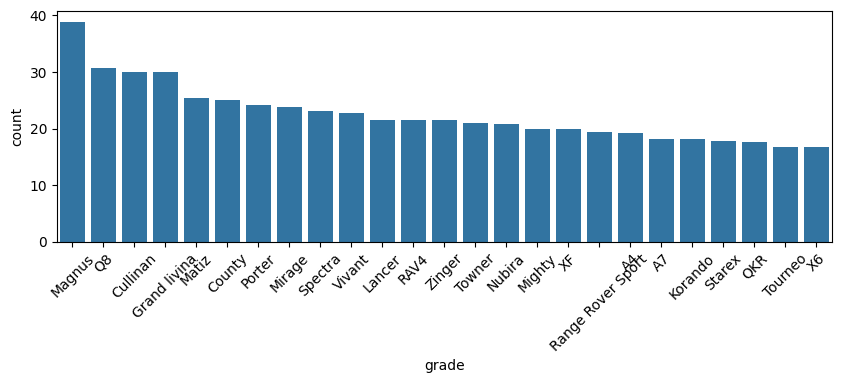

In [398]:
plt.figure(figsize=(10,3))
sns.barplot((plot_data.grade.value_counts()*100/vie_data.grade.value_counts()).nlargest(25))
plt.xticks(rotation=45)
plt.show()

### <font color=D5B85A> Saving the model

In [400]:
#with open('dtree_car_model.pkl', 'wb') as file:
    #pickle.dump(tree_price, file)

In [ ]:
with open('car_model.pkl', 'rb') as file:
    price_predictor=pickle.load(file)

In [ ]:
new_data=pd.read_csv('raw_car_data.csv')

In [ ]:
new_data.drop(columns='Unnamed: 0',inplace=True)

### <font color=D5B85A>After model evaluations

In [401]:
def encode_model_data(df):
    
    df['mileage']=scaler.transform(df[['mileage']])

    brand_grade_encoded=encoder_brand_grade.transform(df[['brand_grade']]).toarray()
    
    others_encoded=encoder_except_brand_grade.transform(df.drop(columns='brand_grade').\
                                              select_dtypes(include='object')).toarray()
    
    data=pd.concat(
     [df.select_dtypes(exclude='object'),
     pd.DataFrame(others_encoded,columns=encoder_except_brand_grade.get_feature_names_out()),
     pd.DataFrame(brand_grade_encoded,columns=encoder_brand_grade.get_feature_names_out())],axis=1)
    
    return(data)
    

In [402]:
def grade_fix(df):
    
    if not df.brand_grade.isin(vie_data.brand_grade.unique()).all():
        index=df[~(df.brand_grade.isin(vie_data.brand_grade.unique()))].index
        df.loc[index,'grade']='other'
        df['brand_grade']=df.brand+'_'+df.grade
        
        return( encode_model_data(df[['origin','condition','car_model','mileage','exterior_color',
                'interior_color','seating_capacity','transmission',
                'drive_type','price_dollars','engine_type','engine_capacity','age',
                'brand_code','brand_grade']]))  # redirecting to other function
    
    else:
        df['brand_grade']=df.brand+'_'+df.grade
        
        return( encode_model_data(df[['origin','condition','car_model','mileage','exterior_color',
                'interior_color','seating_capacity','transmission',
                'drive_type','price_dollars','engine_type','engine_capacity','age',
                'brand_code','brand_grade']])) # redirecting to other function 


In [403]:
def brand_fix(df):
    
    if not df.brand.isin(vie_data.brand.unique()).all():
        index=df[~(df.brand.isin(vie_data.brand.unique()))].index
        df.loc[index,'brand']='other'
        return( grade_fix(df) )
    
    else:
        return(grade_fix(df))

In [404]:
def make_model_data(df):

    df=df.reset_index(drop=True)
    current_year=datetime.now().year
    df['age']=current_year-df.year_of_manufacture
    df.loc[df.index,'brand_code']=df.loc[df.index,'brand'].map(by_brand\
                                                               .groupby('brand').encoded.mean())
    df.brand_code.fillna(5)
    return(brand_fix(df))

In [405]:
ra_fo_list,d_tree_list,xg_list=[],[],[]
for i in range(100):
    gg=req_data.dropna().sample(100)
    price_prediction_new=make_model_data(gg)
    
    if not price_prediction_new.isnull().any().sum():
        yy=price_prediction_new[['price_dollars']]
        
        d_tree=tree_price.predict(price_prediction_new.drop(columns='price_dollars'))
        d_tree_list.append(mae(yy,d_tree))
        
        ra_fo=forest_model.predict(price_prediction_new.drop(columns='price_dollars'))
        ra_fo_list.append(mae(yy,ra_fo))
        
        xg=xgboost_price.predict(price_prediction_new.drop(columns='price_dollars'))
        xg_list.append(mae(yy,xg))

In [406]:
print(f'Average_means_of_different_models_after_100_samples_of_100 :\n',\
      f'ra_fo : {np.round(np.mean(ra_fo_list),2)}\n',\
      f'd_tree : {np.round(np.mean(d_tree_list),2)}\n',\
      f'xg : {np.round(np.mean(xg_list),2)}')

Average_means_of_different_models_after_100_samples_of_100 :
 ra_fo : 2402.79
 d_tree : 1996.2
 xg : 4104.47


### <font color=D5B85A> Creating Reference Table for App

In [827]:
ref_data=pd.read_csv('car_data.csv')

In [829]:
ref_data.drop(columns='Unnamed: 0',inplace=True)

In [839]:
engine_capacity_table_by_brand=\
ref_data.groupby('brand').engine_capacity.mean().round(2).reset_index()

In [842]:
engine_capacity_table_by_brand_grade=\
ref_data.groupby('brand_grade').engine_capacity.mean().round(2).reset_index()

In [355]:
vie_data[vie_data.engine_type=='Electric'][['car_model','brand_grade']].value_counts().nlargest(10)

car_model  brand_grade        
SUV        VinFast_VF8            139
Crossover  VinFast_VF e34          72
SUV        VinFast_VF9             38
Sedan      Porsche_other            9
Crossover  VinFast_VF5              7
Sedan      Mercedes Benz_other      7
SUV        VinFast_VF5              5
           VinFast_VF e34           2
Crossover  Ford_Mustang             1
           VinFast_VF8              1
Name: count, dtype: int64